## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#added joblib code by request of colab
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 joblib==1.4.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
#reading and manipulating data
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#models and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

#decision tree modeling
from sklearn.tree import DecisionTreeClassifier

#oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#kfolds and cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
#load data from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read data
data = pd.read_csv('/content/drive/My Drive/AI Cert Course/Advanced Machine Learning/Project 3/EasyVisa.csv')

In [ ]:
#make copy of data to avoid changing original
df = data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
df.shape

(25480, 12)

There are 12 columns and 25,480 rows.

#### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* 9 of the variables are categorical, and 3 are numerical
* case_status is the dependent variable
* There are no missing values

In [ ]:
#check for duplicates
int(df.duplicated().sum())

0

There are no duplicates.

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking what the four units of wage included in the dataset are
df['unit_of_wage'].value_counts()

,unit_of_wage
Year,22962
Hour,2157
Week,272
Month,89


* The unique count of case_id shows that there are no duplicates
* Most of the applicants are from Asia
* Most of the applicants have a Bachelor's degree
* Most of the applicants have job experience
* Most of the applicants do not require job training
* Most of the applicants seek to work in the Northeast
* Most of the applicants are seeking a full-time position
* Most of the cases were certified
* Some employers have a negative number of employees, with the minimum number -26 and the max 602,069, and the average  about 5,667
* The oldest employers were established in 1800, and the youngest employers were established in 2016, with the average year of establishement 1979
* The lowest prevailing wage is 2.13, with the maximum 319,210 and the average 74,455. However, the figures are not uniform, as there are four units of wage represented -- yearly, hourly, weekly, and monthly
* Most applicants had their cases certified

#### Fixing the negative values in number of employees columns

In [ ]:
#We should replace the negative employee counts with 0

#a look at the rows with negative employee counts
df.loc[df['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:
#find all the rows with negative employee counts, replace with 0
df.loc[df['no_of_employees'] < 0, 'no_of_employees'] = 0

In [ ]:
#make sure the negative employee counts are all gone
df['no_of_employees'].describe()

,no_of_employees
count,25480.000000
mean,5667.066209
std,22877.923141
min,0.000000
25%,1022.000000
50%,2109.000000
75%,3504.000000
max,602069.000000


Negative employee counts are gone.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
df['continent'].value_counts()

,continent
Asia,16861
Europe,3732
North America,3292
South America,852
Africa,551
Oceania,192


Most applicants are from countries in Asia, followed by Europe and North America, South America, Africa, and Oceania.

In [ ]:
df['education_of_employee'].value_counts()

,education_of_employee
Bachelor's,10234
Master's,9634
High School,3420
Doctorate,2192


Most of the applicants have a Bachelor's degree, followed by a Master's degree. The smallest minority has a doctorate.

In [ ]:
df['has_job_experience'].value_counts()

,has_job_experience
Y,14802
N,10678


Most of the applicants have job experience.

In [ ]:
df['requires_job_training'].value_counts()

,requires_job_training
N,22525
Y,2955


Most of the applicants do not need job training.

In [ ]:
df['region_of_employment'].value_counts()

,region_of_employment
Northeast,7195
South,7017
West,6586
Midwest,4307
Island,375


Most applicants seek to work in the Northeast, followed by the South, West, and Midwest. Only a few seek to work on an island region.

In [ ]:
df['unit_of_wage'].value_counts()

,unit_of_wage
Year,22962
Hour,2157
Week,272
Month,89


Most of the roles sought are paid yearly, followed by hourly, weekly, and monthly.

In [ ]:
df['full_time_position'].value_counts()

,full_time_position
Y,22773
N,2707


The vast majority of the roles sought are full-time.

In [ ]:
df['case_status'].value_counts()

,case_status
Certified,17018
Denied,8462


Most applicants had their cases approved by about a 2:1 ratio. This is the target variable.

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

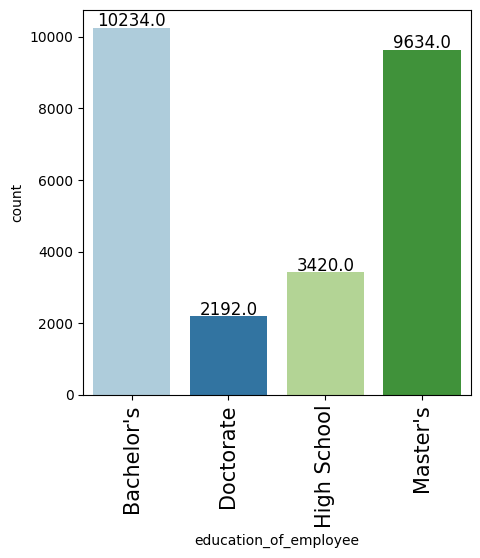

In [ ]:
labeled_barplot(df, 'education_of_employee');

As previously noted, most applicants have a Bachelor's degrees, followed by a Master's degree, then a high school diploma and then a Doctorate. The Bachelor's and Master's applicants make up significant majorities.

#### Observations on region of employment

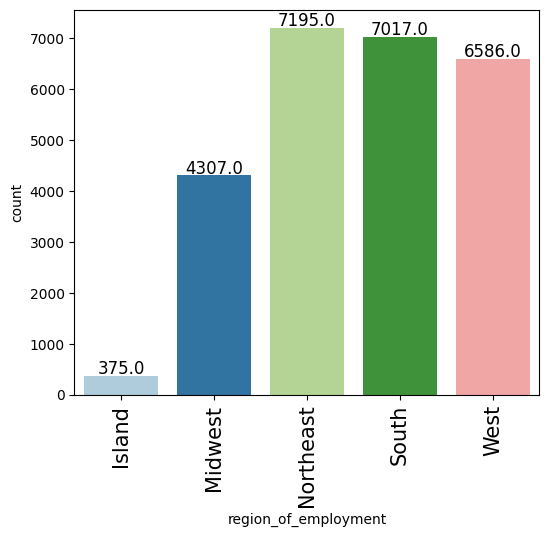

In [ ]:
labeled_barplot(df, 'region_of_employment');

The Northeast is the top region of employment, followed by South and West. Island has the smallest.

#### Observations on job experience

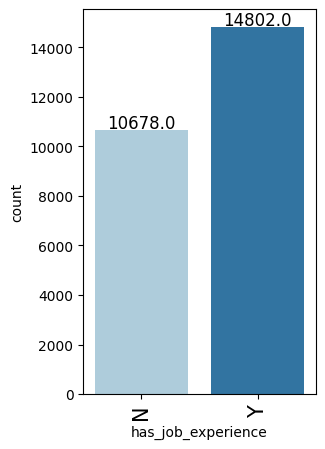

In [ ]:
labeled_barplot(df, 'has_job_experience');

Most applicants have job experience, but a sizable portion do not.

#### Observations on case status

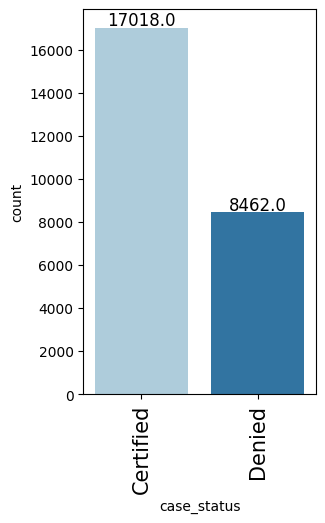

In [ ]:
labeled_barplot(df, 'case_status');

About twice as many applicants had their cases certified compared to those who had their cases denied.

#### Extra: Observations on number of employees

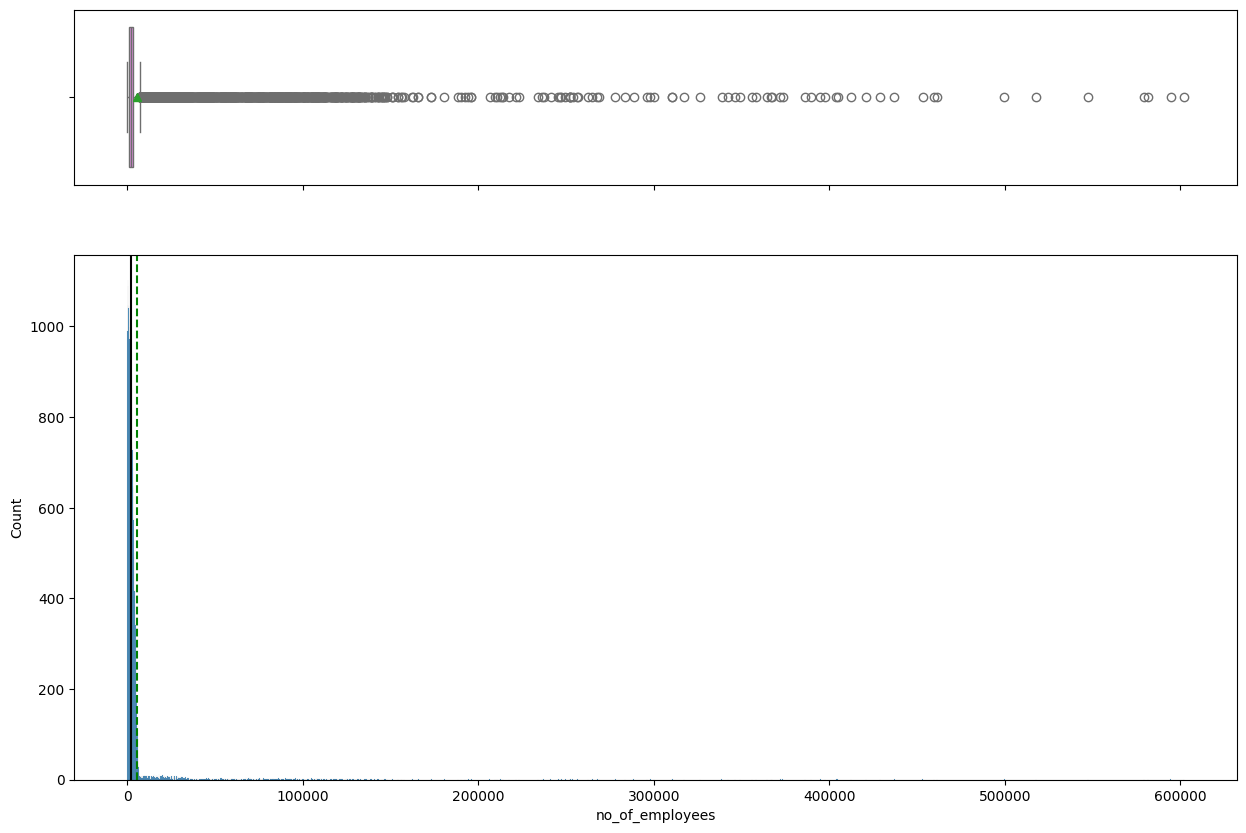

In [ ]:
histogram_boxplot(df, 'no_of_employees')

There are a lot of outliers -- the mean is 5,667 and the biggest employer has 602,069 employees.

#### Extra: year of establishment

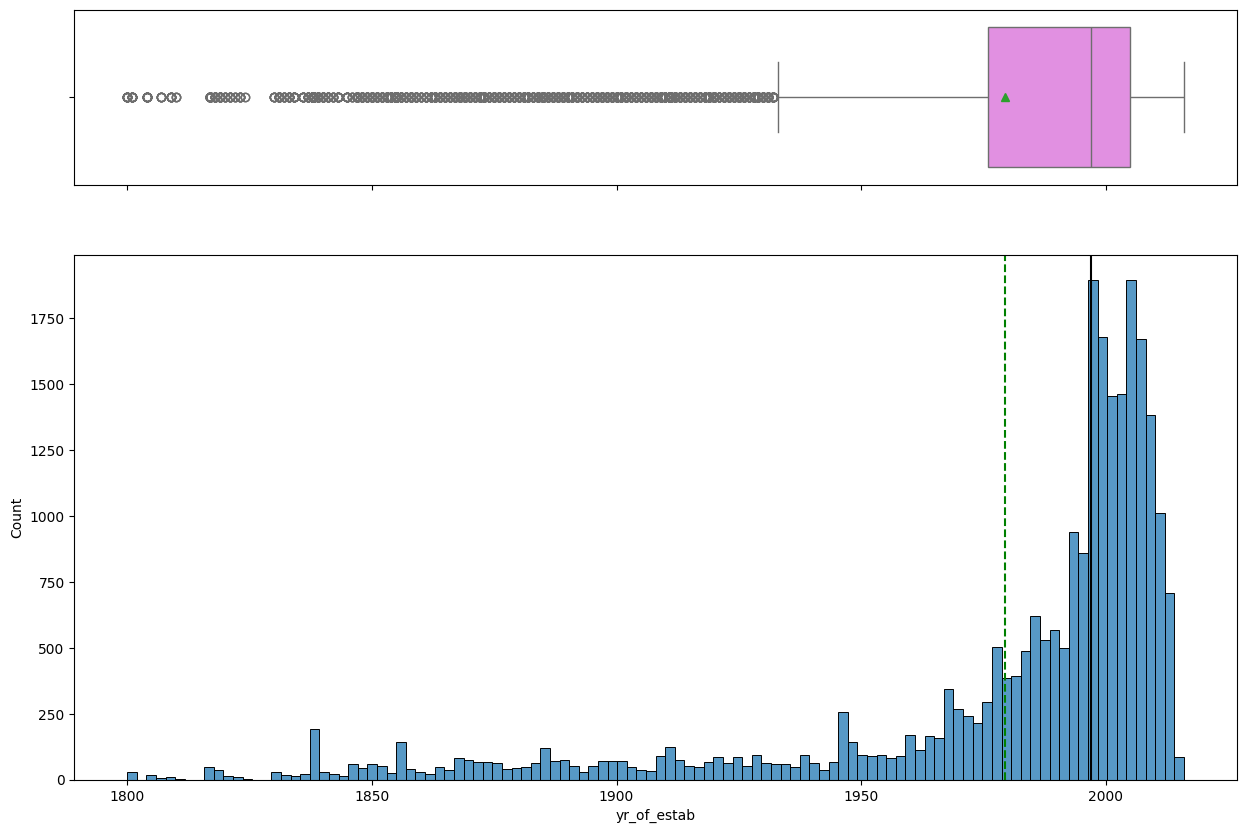

In [ ]:
histogram_boxplot(df, 'yr_of_estab');

50 percent of the employers were established between 1976 and 2005, with the oldest being established in 1800 and the newest being established in 2016.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

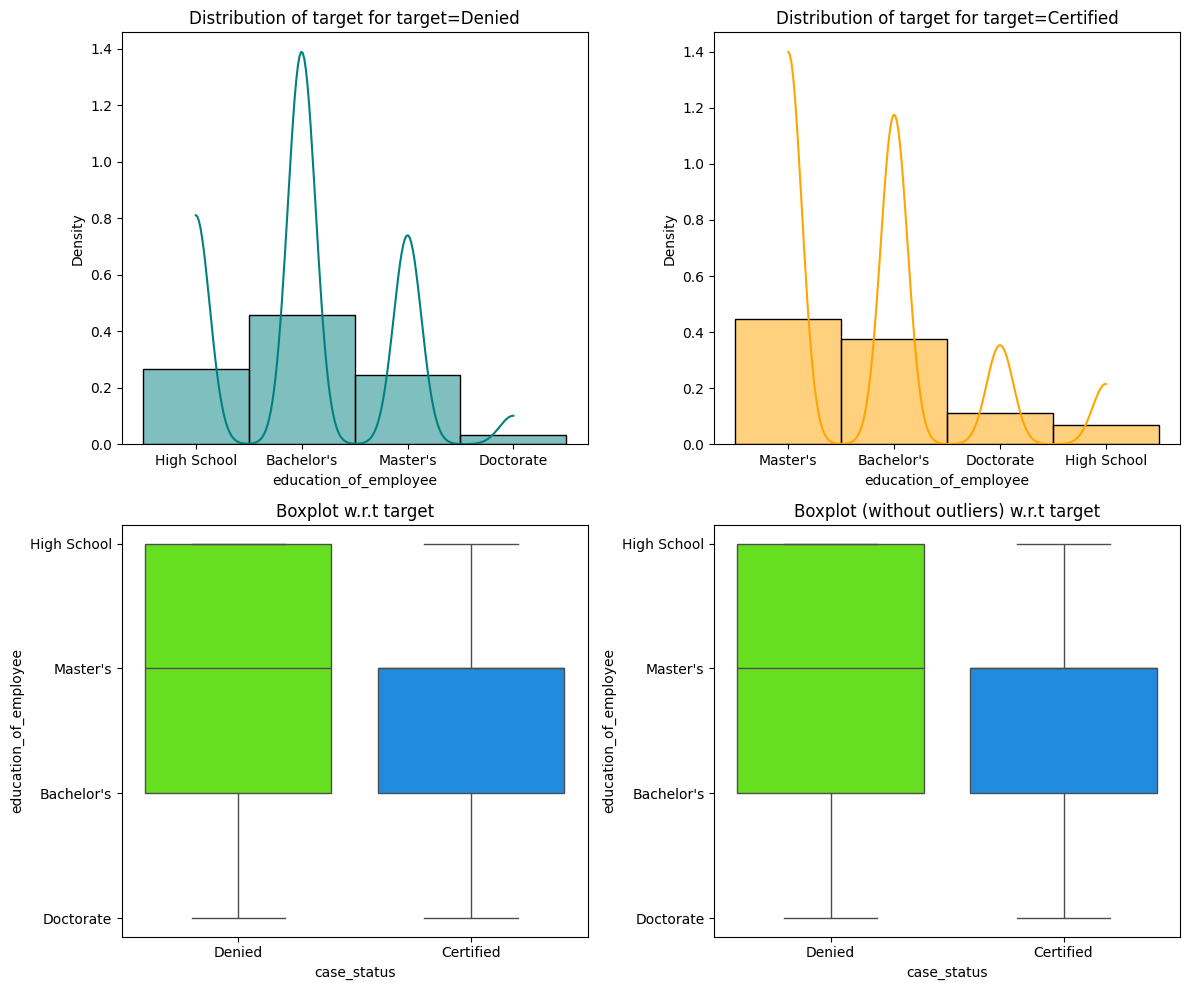

In [ ]:
distribution_plot_wrt_target(df, 'education_of_employee', 'case_status');

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


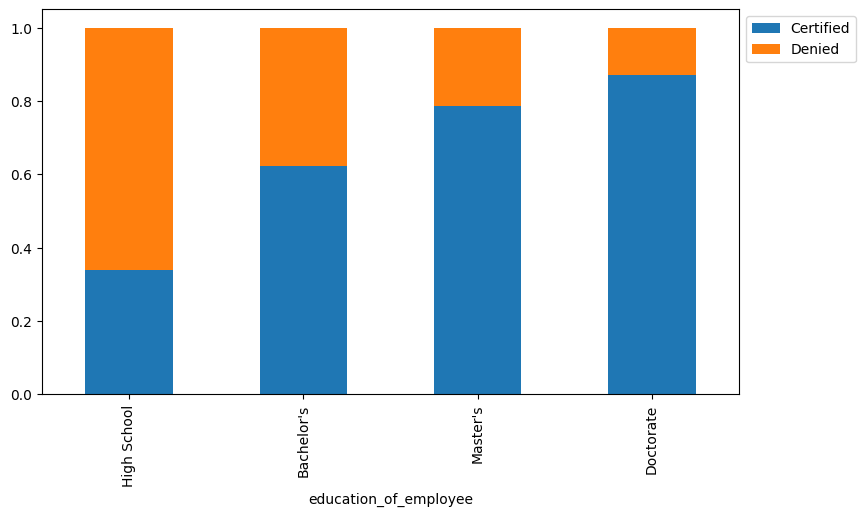

In [ ]:
stacked_barplot(df, 'education_of_employee', 'case_status');

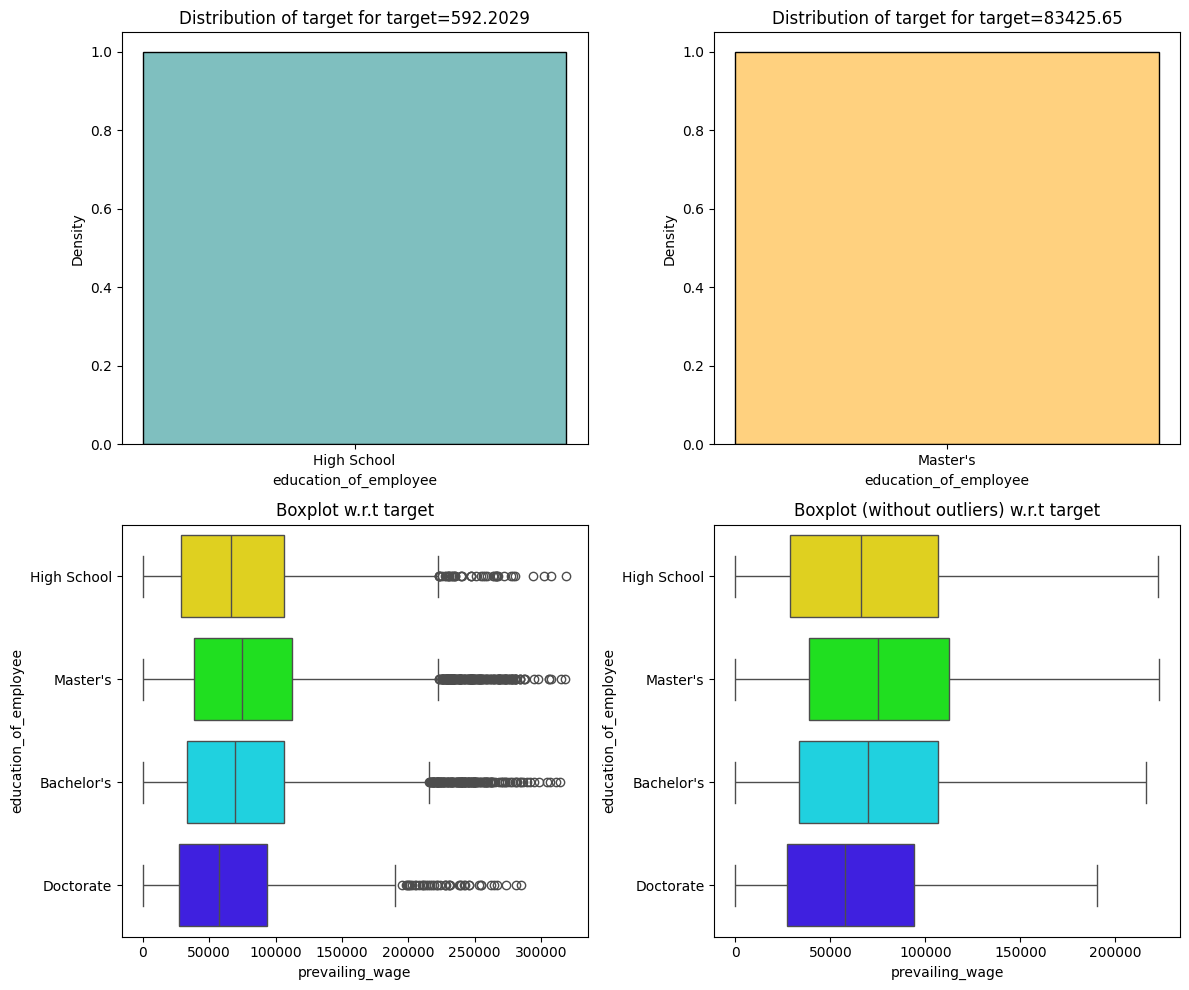

In [ ]:
distribution_plot_wrt_target(df, 'education_of_employee', 'prevailing_wage');

It does appear that higher education increases the chances of having a case certified -- applicants with only a high school diploma had the highest rate of case denials, while those with a doctorate had the highest rate of certifications. Applicants with a bachelors or master's degree also had higher rates of case certifications -- more than 50 percent.

When looking at education and prevailing wage, applicants with a Master's degree have a slight edge for a higher-paying job. Interestingly, though, applicants with a doctorate appeared to have lower median salaries compared to any other education groups.

#### How does visa status vary across different continents?

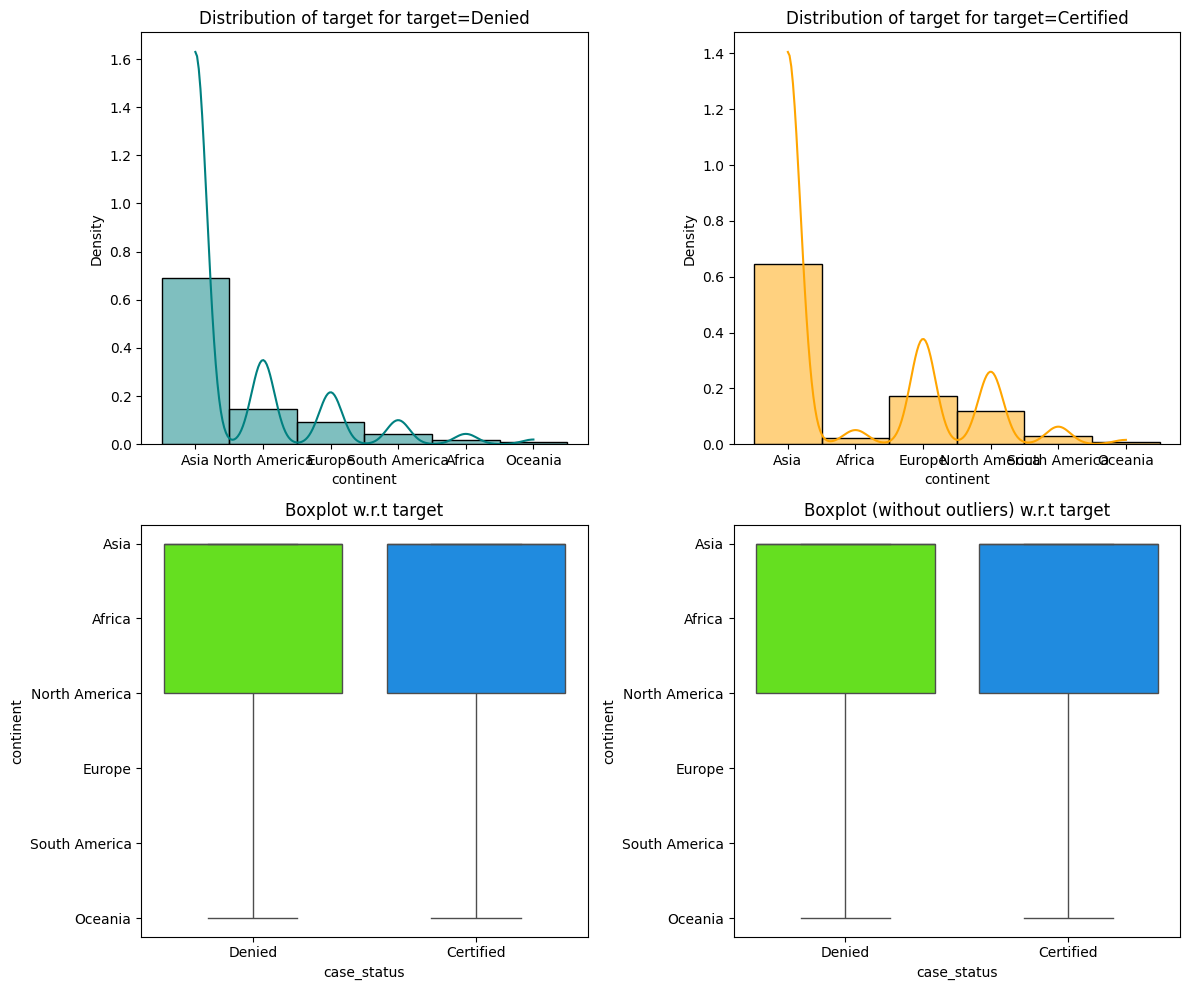

In [ ]:
distribution_plot_wrt_target(df, 'continent', 'case_status');

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


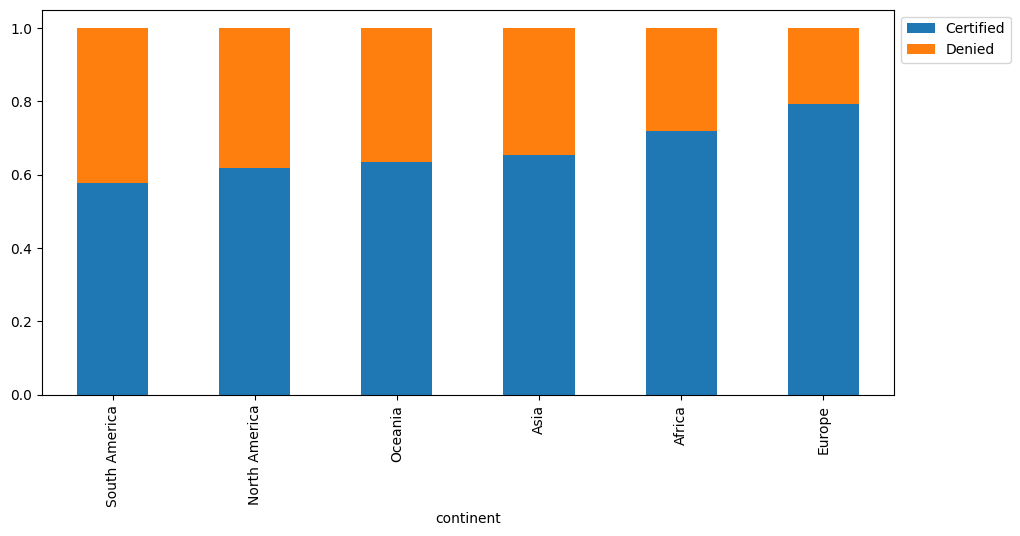

In [ ]:
stacked_barplot(df, 'continent', 'case_status');

Europe had the highest certification rate, followed by Africa and Asia. South America had the lowest. That said, Oceania had the fewest number of applicants.

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

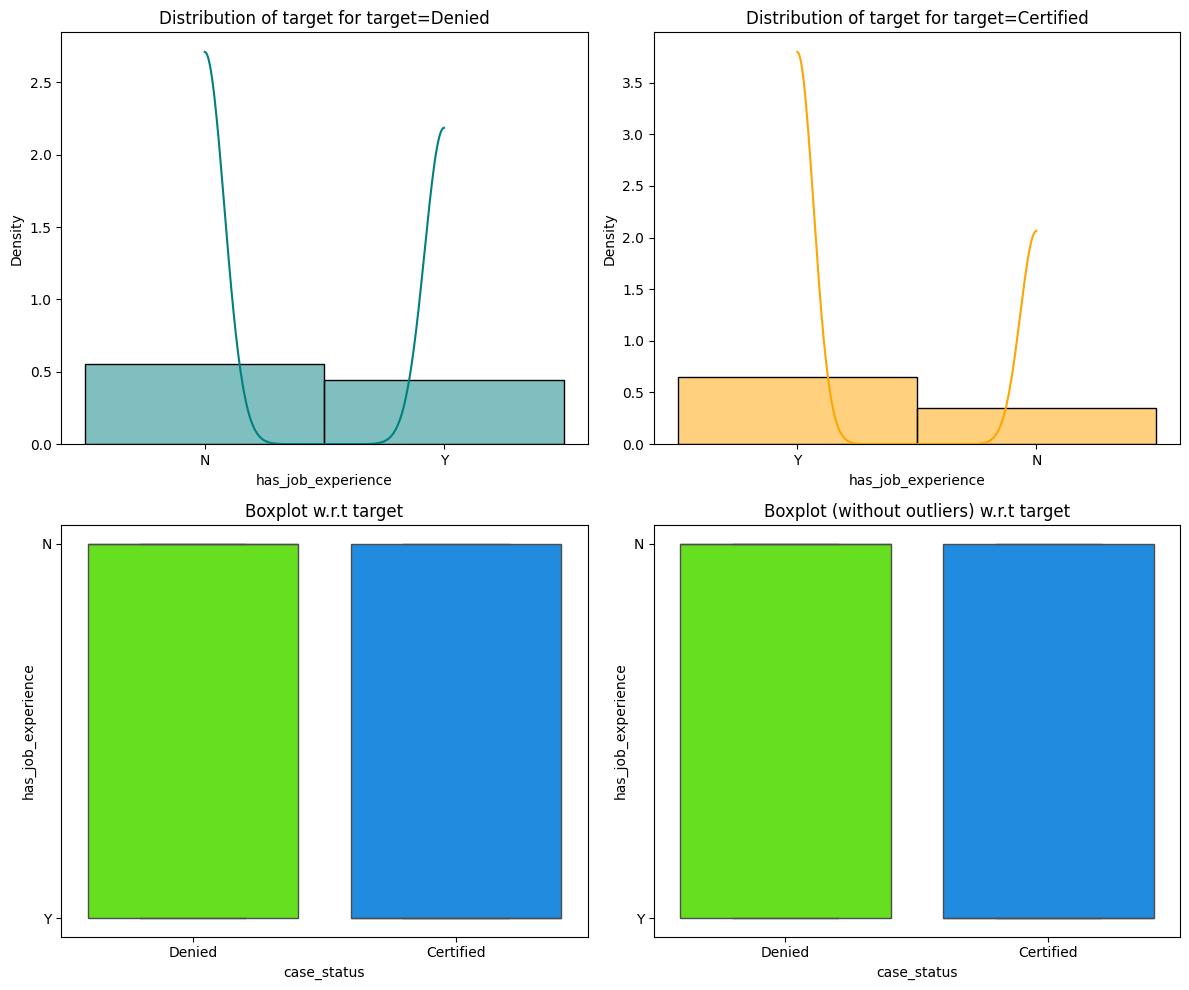

In [ ]:
distribution_plot_wrt_target(df, 'has_job_experience', 'case_status');

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


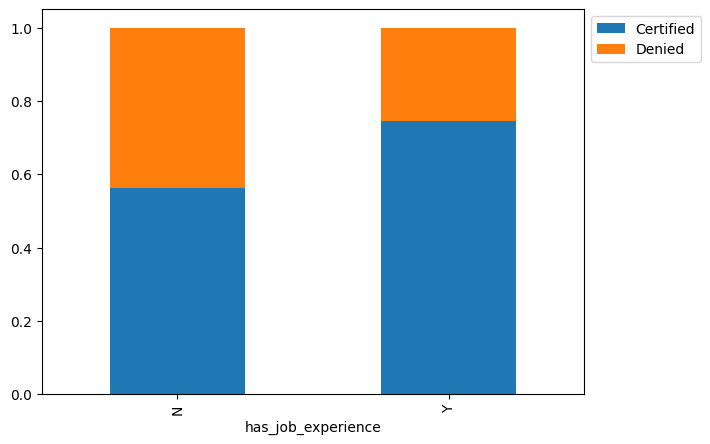

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status');

Having work experience appears to improve the chances of case certification -- most applicants who did not have job experience had their case denied.

#### Is the prevailing wage consistent across all regions of the US?

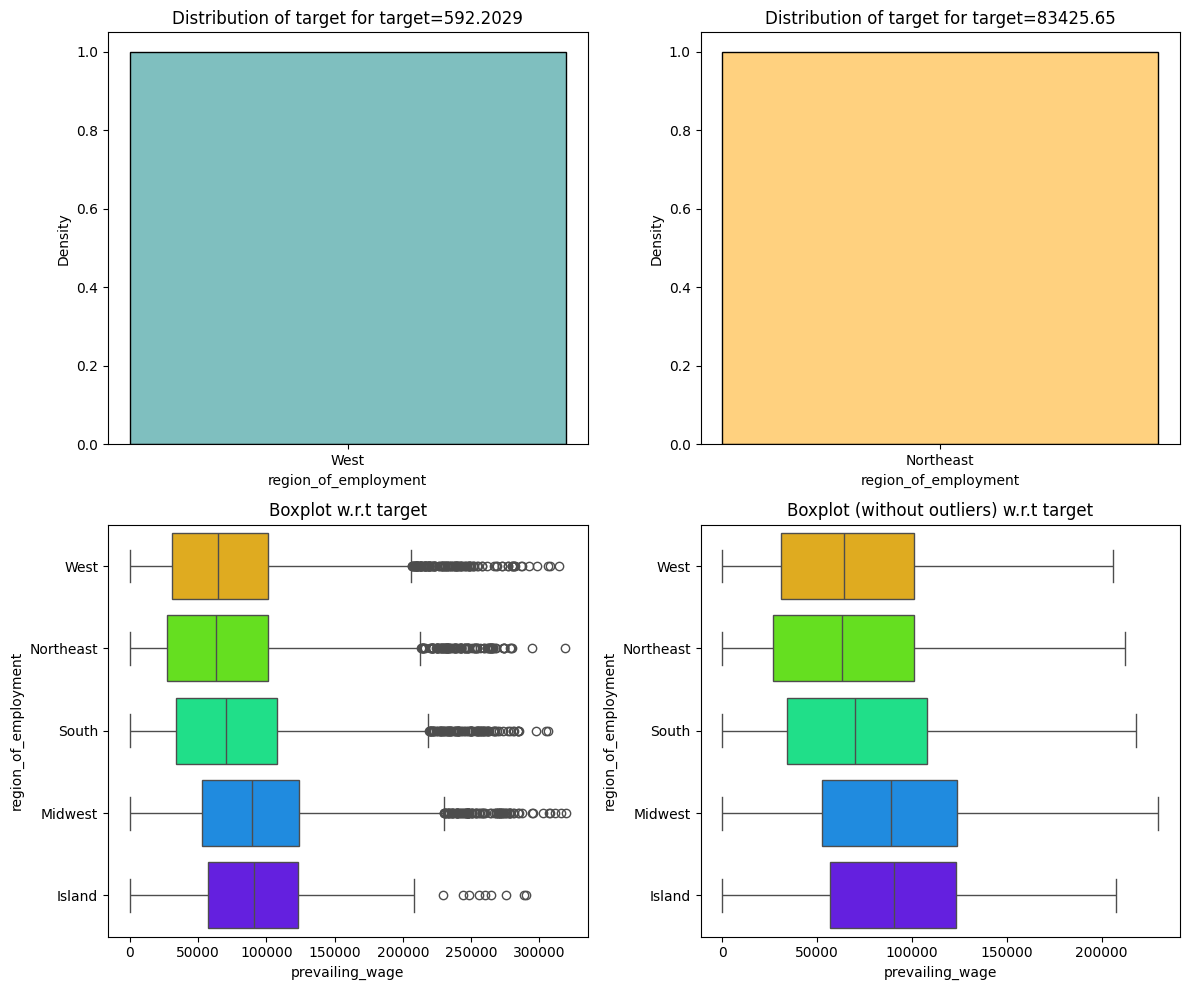

In [ ]:
distribution_plot_wrt_target(df, 'region_of_employment', 'prevailing_wage');

* The prevailing wage varies slightly across the several regions, but the ranges are all mostly in the same areas between about 30,000 and 130,000.
* The Island region has the smallest number of outliers, while all the other regions have substantial outliers.
* The Island and Midwest region prevailing wages trend slightly higher.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

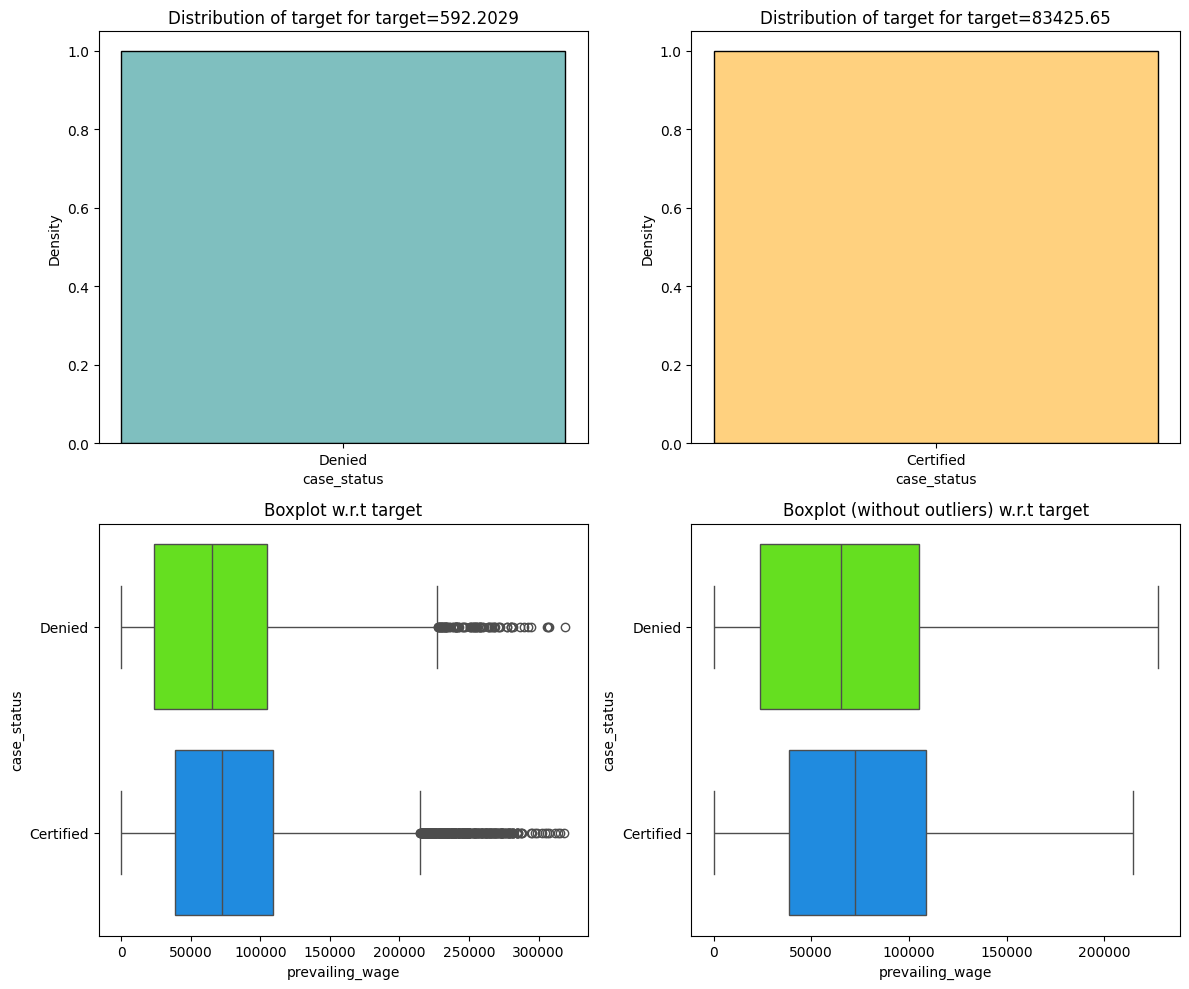

In [ ]:
distribution_plot_wrt_target(df, 'case_status', 'prevailing_wage');

The prevailing wage for similarly-employed workers of applicants whose cases were certified is slghtly higher than those whose cases were denied. This means applicants seeking high-paying jobs seem to see higher certification rates, while applicants seeking lower-paying jobs had lower certification rates.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


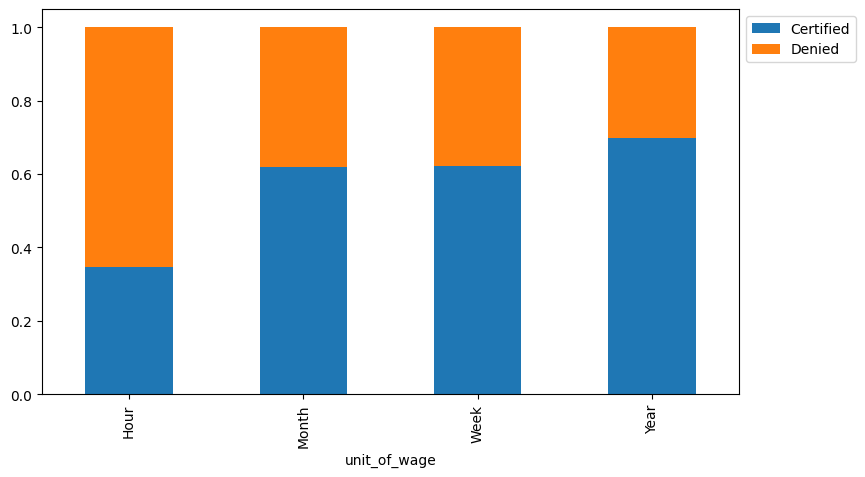

In [ ]:
stacked_barplot(df, 'unit_of_wage', 'case_status');

Most applicants are seeking roles with a yearly salary, and those applicants had the highest rate of case certification. Applicants seeking roles with an hourly salary had the lowest rate of case certification, and more than half of their cases were denied.

#### Extra: pairplot

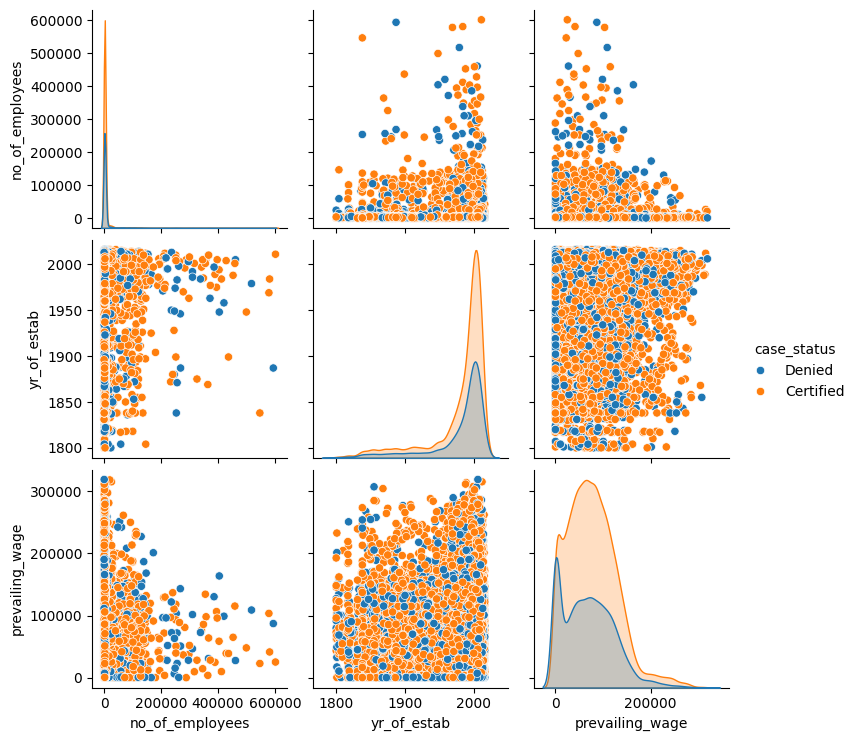

In [ ]:
sns.pairplot(df, hue="case_status");

## Data Pre-processing

### Outlier Check

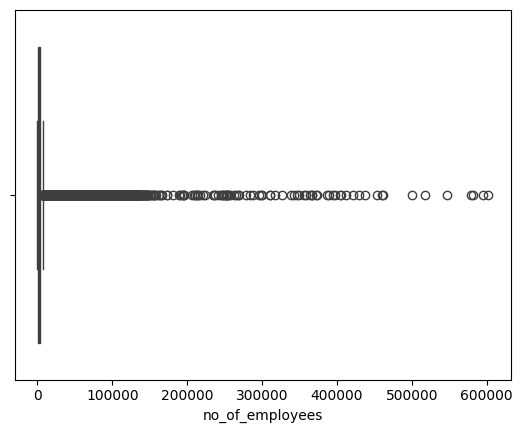

In [ ]:
sns.boxplot(data=df, x='no_of_employees');

In [ ]:
#identify the number of employees upper and lower whiskers, beyond which datapoints are outliers
q1 = df['no_of_employees'].quantile(0.25)
q3 = df['no_of_employees'].quantile(0.75)
iqr = q3-q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
print("Upper whisker: ", upper_whisker, "Lower whisker: ", lower_whisker)

Upper whisker:  7227.0 Lower whisker:  -2701.0


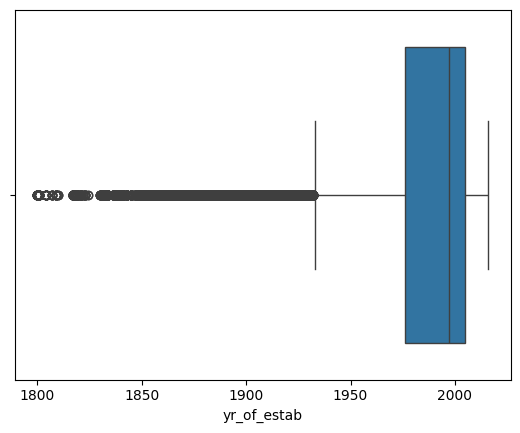

In [ ]:
sns.boxplot(data=df, x='yr_of_estab');

In [ ]:
#identify the year of establishment upper and lower whiskers, beyond which datapoints are outliers
q1 = df['yr_of_estab'].quantile(0.25)
q3 = df['yr_of_estab'].quantile(0.75)
iqr = q3-q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
print("Upper whisker: ", upper_whisker, "Lower whisker: ", lower_whisker)

Upper whisker:  2048.5 Lower whisker:  1932.5


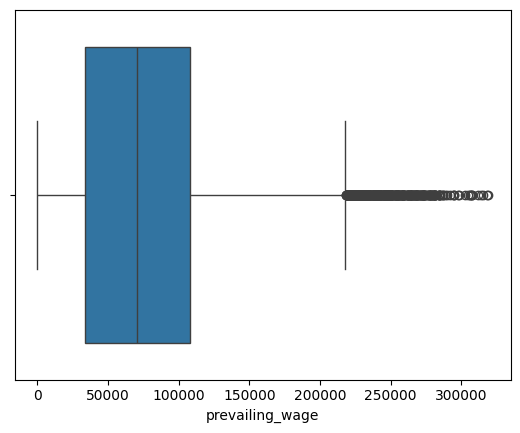

In [ ]:
sns.boxplot(data=df, x='prevailing_wage');

In [ ]:
#identify the prevailing wage upper and lower whiskers, beyond which datapoints are outliers
q1 = df['prevailing_wage'].quantile(0.25)
q3 = df['prevailing_wage'].quantile(0.75)
iqr = q3-q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
print("Upper whisker: ", upper_whisker, "Lower whisker: ", lower_whisker)

Upper whisker:  218315.56125000003 Lower whisker:  -76564.56875000002


The three numeric variables have outliers:
* Some of the companies applicants are seeking employment with have outliers on the high end with regard to the number of employees. Companies with employee counts above 7,227 are outliers
* Some of the companies applicants are seeking employment with have outliers on the lower end of establishment year. Companies established before 1932 are outliers
* Some of the prevailing wages of the roles applicants are seeking have outliers on the higher end. Wages above 218,315 are outliers. That said, the prevailing wages are not uniform in their unit of wage

### Data Preparation for modeling

In [ ]:
#case ID is unique for each applicant and won't help with modeling, so we'll drop it
df.drop(['case_id'], axis = 1, inplace = True)

In [ ]:
#encode the target variable
df['case_status'] = df['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

#see how it looks
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [ ]:
#set up X and y
X = df.drop(['case_status'], axis = 1)
y = df['case_status']

In [ ]:
#split data into training, validation, and test set
#temp and test:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

#val and train:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 1, stratify = y_temp)

#see how it looks
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [ ]:
#make dummies
X_train = pd.get_dummies(X_train, drop_first = True)
X_val = pd.get_dummies(X_val, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

#see how it looks
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

The model can make wrong predictions by:
* Predicting an applicant will have their case denied but they would actually have their case certified
* Predicting an applicant will have their case certified but they would actually have their case denied

Which is more important?
* Predicting an applicant will have their case denied but would actually have their case certified would mean the labor force, an employer, and the U.S. economy would miss out on a potential worker

How do we reduce the loss?
* We want to reduce the chance of applicants who would be certified being predicted as denied -- thus reduce the chance of false negatives
* Thus, we should use recall as our evaluation metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
scorer = metrics.make_scorer(metrics.recall_score)
kfold = KFold(n_splits = 10, random_state = 1, shuffle = True)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

### Bagging

In [ ]:
#training
bag1 = BaggingClassifier(random_state = 1)
bag1.fit(X_train, y_train)
model_performance_classification_sklearn(bag1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.985544,0.98668,0.991633,0.98915


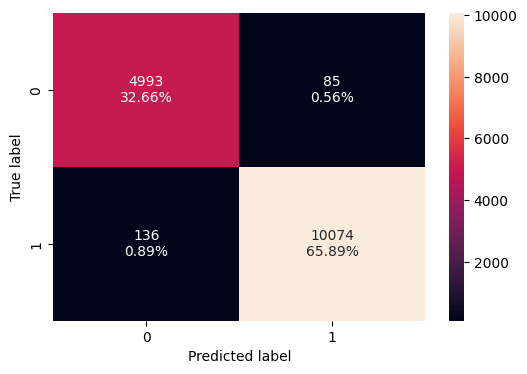

In [ ]:
confusion_matrix_sklearn(bag1, X_train, y_train)

In [ ]:
#validation
bag1val = model_performance_classification_sklearn(bag1, X_val, y_val)
bag1val

,Accuracy,Recall,Precision,F1
0,0.697998,0.770564,0.775806,0.773176


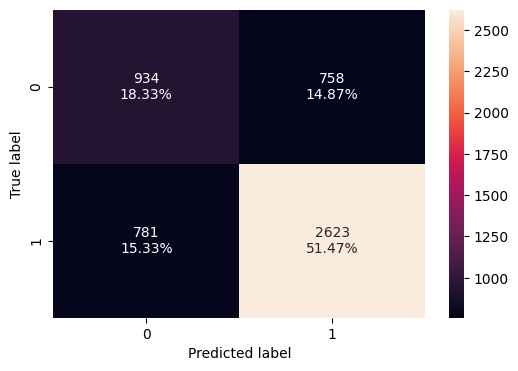

In [ ]:
confusion_matrix_sklearn(bag1, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(bag1, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.75662414 0.7798618  0.77890467 0.78121975 0.77606178 0.76065891
 0.78003876 0.77558685 0.76656473 0.76702863]
Recall: 77.226% (0.841%)


In [ ]:
#put the mean cross validated recall and standard deviation in a dataframe
bag1cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
bag1cv

,Recall,Std dev
0,77.2255,0.840901


### Decision Tree

In [ ]:
#training
dt1 = DecisionTreeClassifier(random_state = 1)
dt1.fit(X_train, y_train)
model_performance_classification_sklearn(dt1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


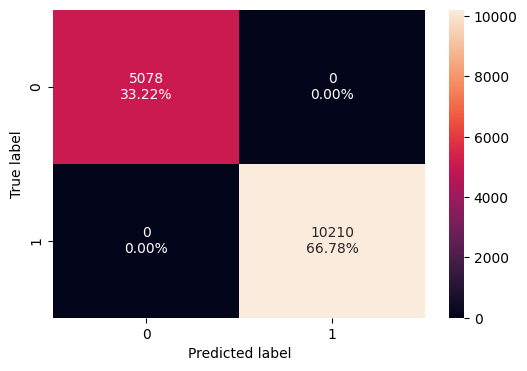

In [ ]:
confusion_matrix_sklearn(dt1, X_train, y_train)

In [ ]:
#validation
dt1val = model_performance_classification_sklearn(dt1, X_val, y_val)
dt1val

,Accuracy,Recall,Precision,F1
0,0.663069,0.745006,0.749188,0.747091


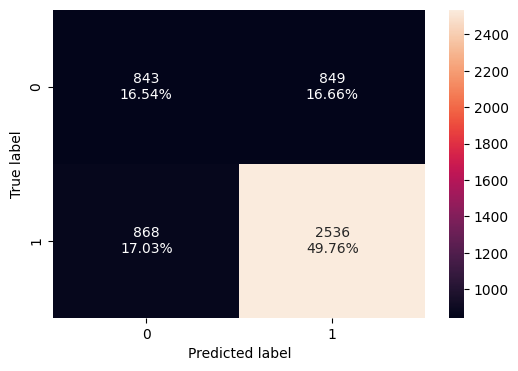

In [ ]:
confusion_matrix_sklearn(dt1, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(dt1, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.72816487 0.75715696 0.73732252 0.74056147 0.73552124 0.73546512
 0.74612403 0.76150235 0.73700306 0.73938796]
Recall: 74.182% (0.979%)


In [ ]:
#put the mean cross validated recall and standard deviation in a dataframe
dt1cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
dt1cv

,Recall,Std dev
0,74.182096,0.979077


### ADA Boost

In [ ]:
#training
ada1 = AdaBoostClassifier(random_state = 1)
ada1.fit(X_train, y_train)
model_performance_classification_sklearn(ada1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.738619,0.887757,0.760786,0.819382


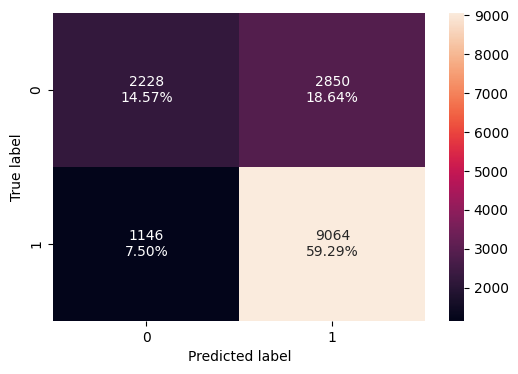

In [ ]:
confusion_matrix_sklearn(ada1, X_train, y_train)

In [ ]:
#validation
ada1val = model_performance_classification_sklearn(ada1, X_val, y_val)
ada1val

,Accuracy,Recall,Precision,F1
0,0.735871,0.882197,0.760638,0.816921


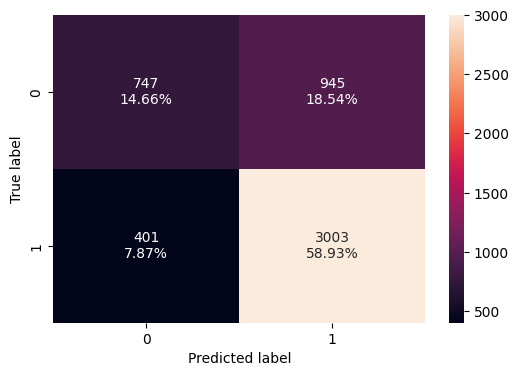

In [ ]:
confusion_matrix_sklearn(ada1, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(ada1, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87144259 0.89930898 0.89249493 0.88383349 0.88416988 0.87984496
 0.87596899 0.90516432 0.87665647 0.89042448]
Recall: 88.593% (1.026%)


In [ ]:
#put the mean cross validated recall and standard deviation in a dataframe
ada1cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
ada1cv

,Recall,Std dev
0,88.593091,1.025612


### Gradient Boost

In [ ]:
#training
gb1 = GradientBoostingClassifier(random_state = 1)
gb1.fit(X_train, y_train)
model_performance_classification_sklearn(gb1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.758176,0.880607,0.783939,0.829466


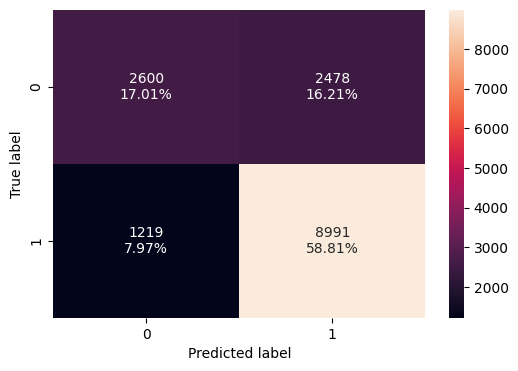

In [ ]:
confusion_matrix_sklearn(gb1, X_train, y_train)

In [ ]:
#validation
gb1val = model_performance_classification_sklearn(gb1, X_val, y_val)
gb1val

,Accuracy,Recall,Precision,F1
0,0.755298,0.875734,0.783443,0.827022


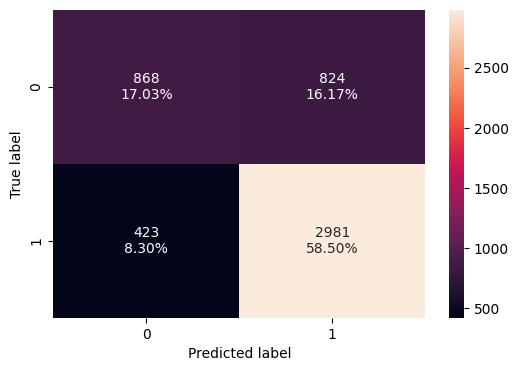

In [ ]:
confusion_matrix_sklearn(gb1, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(gb1, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.84592738 0.89141165 0.87221095 0.86640852 0.86100386 0.87209302
 0.86724806 0.89389671 0.87665647 0.88450148]
Recall: 87.314% (1.370%)


In [ ]:
#cross validation scores dataframe
gb1cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
gb1cv

,Recall,Std dev
0,87.313581,1.369651


### Random Forest

In [ ]:
#training
rf1 = RandomForestClassifier(random_state = 1, class_weight = 'balanced')
rf1.fit(X_train, y_train)
model_performance_classification_sklearn(rf1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


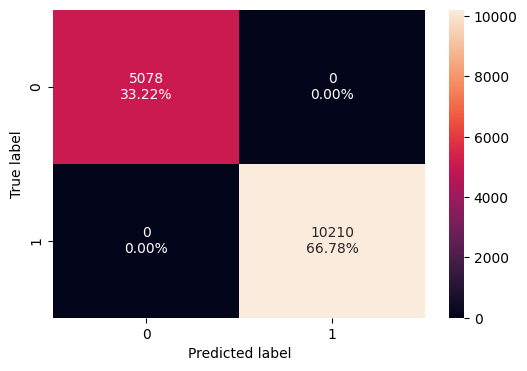

In [ ]:
confusion_matrix_sklearn(rf1, X_train, y_train)

In [ ]:
#validation
rf1val = model_performance_classification_sklearn(rf1, X_val, y_val)
rf1val

,Accuracy,Recall,Precision,F1
0,0.726845,0.840776,0.771013,0.804384


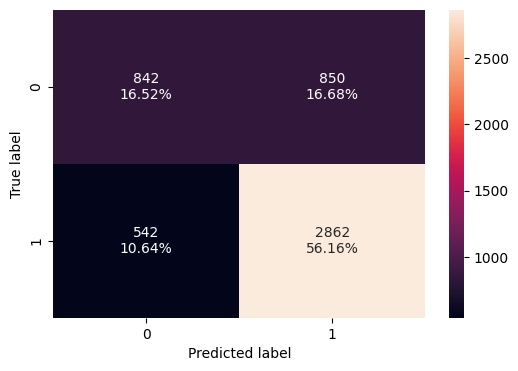

In [ ]:
confusion_matrix_sklearn(rf1, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(rf1, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.81844946 0.86574531 0.85496957 0.83736689 0.84749035 0.8498062
 0.85174419 0.85915493 0.84199796 0.84797631]
Recall: 84.747% (1.235%)


In [ ]:
#cross validation scores dataframe
rf1cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
rf1cv

,Recall,Std dev
0,84.747012,1.234892


### XGBoost

In [ ]:
#training
xgb1 = XGBClassifier(random_state = 1, eval_metric = "logloss")
xgb1.fit(X_train, y_train)
model_performance_classification_sklearn(xgb1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.854461,0.94094,0.855553,0.896217


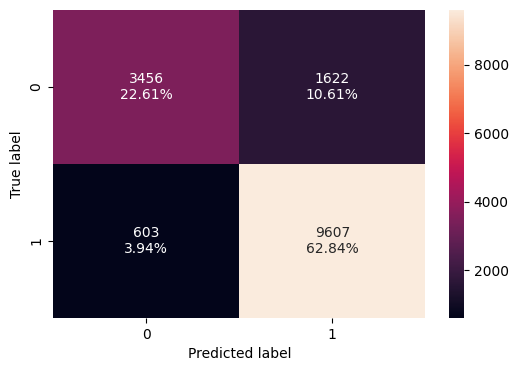

In [ ]:
confusion_matrix_sklearn(xgb1, X_train, y_train)

In [ ]:
#validation
xgb1val = model_performance_classification_sklearn(xgb1, X_val, y_val)
xgb1val

,Accuracy,Recall,Precision,F1
0,0.731358,0.854583,0.768966,0.809517


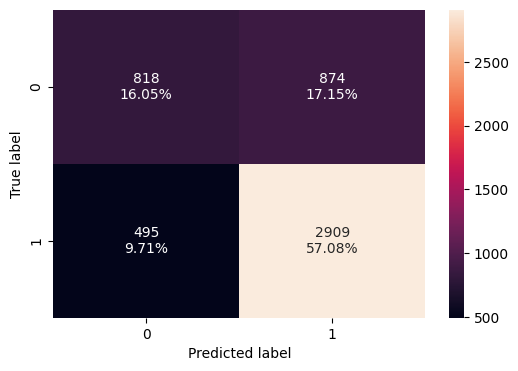

In [ ]:
confusion_matrix_sklearn(xgb1, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(xgb1, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.83415113 0.86574531 0.85091278 0.85188771 0.86486486 0.8372093
 0.85271318 0.86197183 0.85728848 0.85883514]
Recall: 85.356% (1.021%)


In [ ]:
#cross validation scores dataframe
xgb1cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
xgb1cv

,Recall,Std dev
0,85.355797,1.02144


### Model Building with Oversampled data

In [ ]:
#checking the distribution of the target variable
df['case_status'].value_counts(1)

,case_status
1,0.667896
0,0.332104


In [ ]:
print("Before Oversampling, 'Certified' label counts: {}".format(sum(y_train == 1)))
print("Before Oversampling, 'Denied' label counts': {} \n".format(sum(y_train == 0)))

Before Oversampling, 'Certified' label counts: 10210
Before Oversampling, 'Denied' label counts': 5078 



In [ ]:
#do oversampling -- I tried sampling_strategy = 1, 0.7, and 0.6, but the recall scores were much worse than with the original data,
#so I reduced it to 0.5 and got the slightly better results in the below models, with fewer synthetic datapoints
sm = SMOTE(sampling_strategy = 0.5, k_neighbors = 5, random_state = 1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
#see the results
print("After Oversampling, 'Certified' label counts: {}".format(sum(y_train_over == 1)))
print("After Oversampling, 'Denied' label counts': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of X_train_over: {}".format(X_train_over.shape))
print("After Oversampling, the shape of y_train_over: {} \n".format(y_train_over.shape))

After Oversampling, 'Certified' label counts: 10210
After Oversampling, 'Denied' label counts': 5105 

After Oversampling, the shape of X_train_over: (15315, 21)
After Oversampling, the shape of y_train_over: (15315,) 



### Bagging

In [ ]:
#training
bag2 = BaggingClassifier(random_state = 1)
bag2.fit(X_train_over, y_train_over)
model_performance_classification_sklearn(bag2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.98446,0.986288,0.990362,0.988321


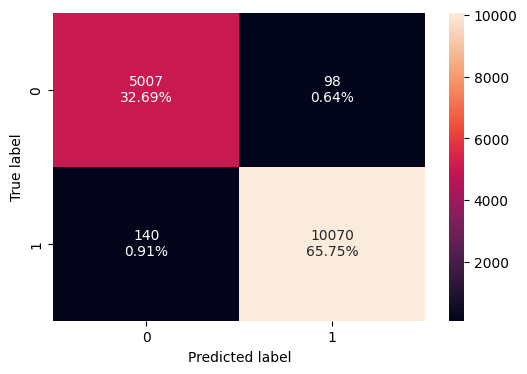

In [ ]:
confusion_matrix_sklearn(bag2, X_train_over, y_train_over)

In [ ]:
#validation
bag2val = model_performance_classification_sklearn(bag2, X_val, y_val)
bag2val

,Accuracy,Recall,Precision,F1
0,0.697214,0.765864,0.777513,0.771644


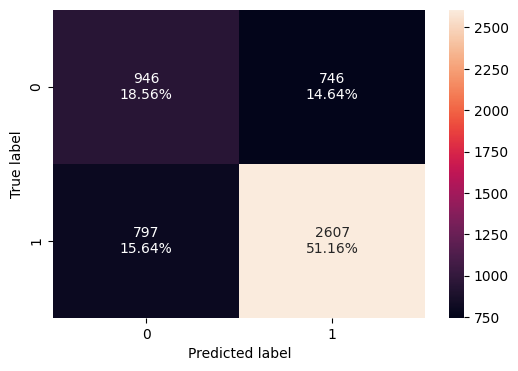

In [ ]:
confusion_matrix_sklearn(bag2, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(bag2, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.78148855 0.76167315 0.7601626  0.77071291 0.77509653 0.7862069
 0.7840796  0.78731343 0.77915377 0.78226601]
Recall: 77.682% (0.925%)


In [ ]:
#cross validation scores dataframe
bag2cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
bag2cv

,Recall,Std dev
0,77.681534,0.924657


### Decision Tree

In [ ]:
#training
dt2 = DecisionTreeClassifier(random_state = 1)
dt2.fit(X_train_over, y_train_over)
model_performance_classification_sklearn(dt2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


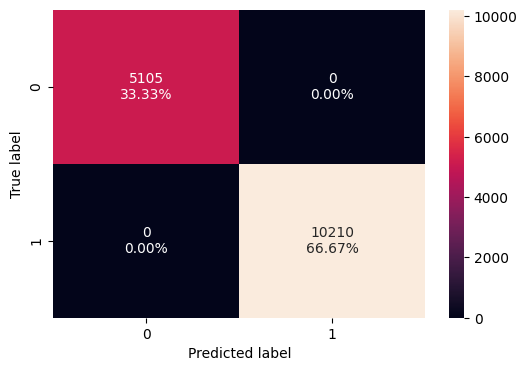

In [ ]:
confusion_matrix_sklearn(dt2, X_train_over, y_train_over)

In [ ]:
#validation
dt2val = model_performance_classification_sklearn(dt2, X_val, y_val)
dt2val

,Accuracy,Recall,Precision,F1
0,0.665031,0.741774,0.753057,0.747373


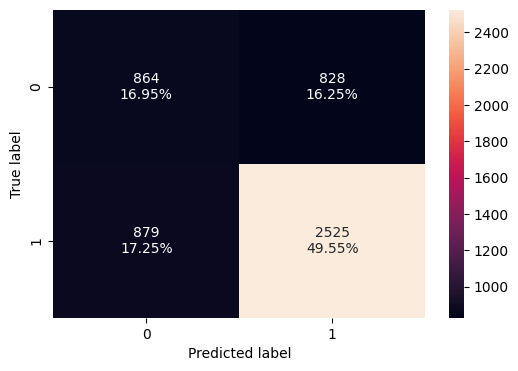

In [ ]:
confusion_matrix_sklearn(dt2, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(dt2, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.75572519 0.73929961 0.7398374  0.74084778 0.74324324 0.74581281
 0.73233831 0.76585821 0.73477812 0.70837438]
Recall: 74.061% (1.430%)


In [ ]:
#put the mean cross validated recall and standard deviation in a dataframe
dt2cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
dt2cv

,Recall,Std dev
0,74.061151,1.429644


### ADA Boost

In [ ]:
#training
ada2 = AdaBoostClassifier(random_state = 1)
ada2.fit(X_train_over, y_train_over)
model_performance_classification_sklearn(ada2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.739341,0.887071,0.761348,0.819416


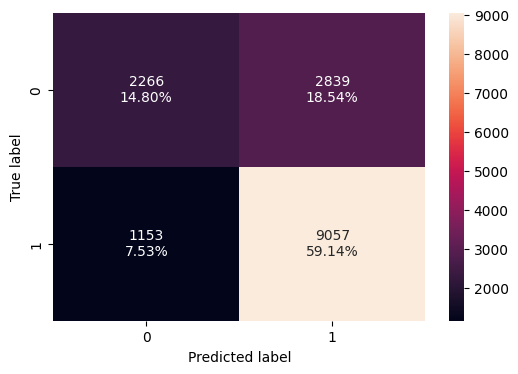

In [ ]:
confusion_matrix_sklearn(ada2, X_train_over, y_train_over)

In [ ]:
#validation
ada2val = model_performance_classification_sklearn(ada2, X_val, y_val)
ada2val

,Accuracy,Recall,Precision,F1
0,0.734498,0.877203,0.76154,0.81529


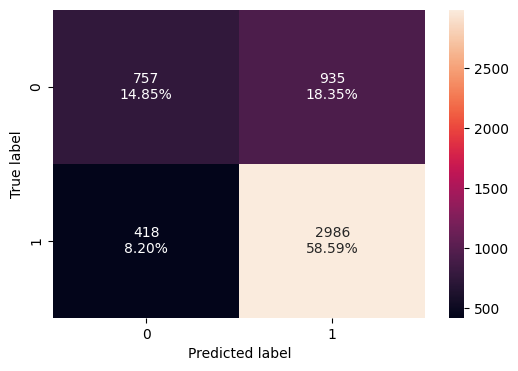

In [ ]:
confusion_matrix_sklearn(ada2, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(ada2, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.88645038 0.89785992 0.87093496 0.87668593 0.8957529  0.88078818
 0.88059701 0.9011194  0.88235294 0.88768473]
Recall: 88.602% (0.922%)


In [ ]:
#cross validation scores dataframe
ada2cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
ada2cv

,Recall,Std dev
0,88.602264,0.922373


### Gradient Boost

In [ ]:
#training
gb2 = GradientBoostingClassifier(random_state = 1)
gb2.fit(X_train_over, y_train_over)
model_performance_classification_sklearn(gb2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.75697,0.878942,0.783072,0.828242


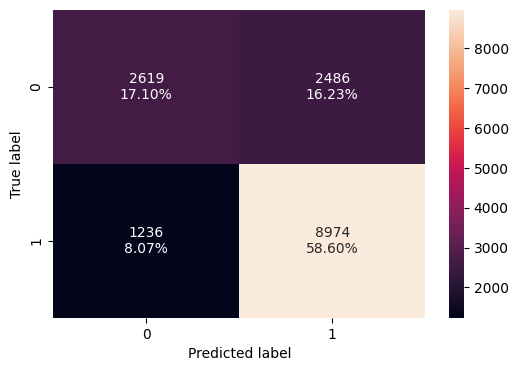

In [ ]:
confusion_matrix_sklearn(gb2, X_train_over, y_train_over)

In [ ]:
#validation
gb2val = model_performance_classification_sklearn(gb2, X_val, y_val)
gb2val

,Accuracy,Recall,Precision,F1
0,0.755298,0.873972,0.78434,0.826733


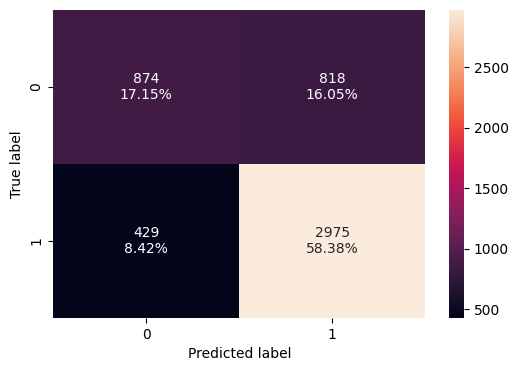

In [ ]:
confusion_matrix_sklearn(gb2, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(gb2, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.8740458  0.88132296 0.8648374  0.85356455 0.87548263 0.86108374
 0.87164179 0.88246269 0.87822497 0.87881773]
Recall: 87.215% (0.899%)


In [ ]:
#cross validation scores dataframe
gb2cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
gb2cv

,Recall,Std dev
0,87.214843,0.898984


### Random Forest

In [ ]:
#training -- dropping "class_weight" parameter since the data we're working with is now slightly better balanced thanks to smote
rf2 = RandomForestClassifier(random_state = 1)
rf2.fit(X_train_over, y_train_over)
model_performance_classification_sklearn(rf2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


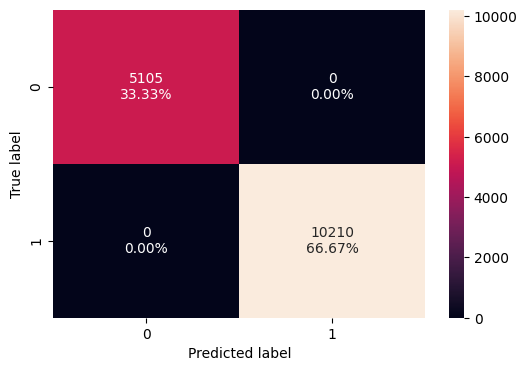

In [ ]:
confusion_matrix_sklearn(rf2, X_train_over, y_train_over)

In [ ]:
#validation
rf2val = model_performance_classification_sklearn(rf2, X_val, y_val)
rf2val

,Accuracy,Recall,Precision,F1
0,0.72763,0.833725,0.77541,0.803511


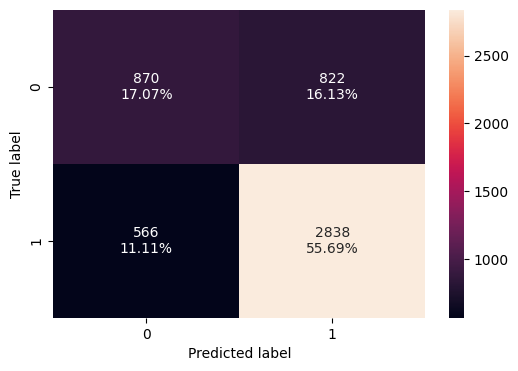

In [ ]:
confusion_matrix_sklearn(rf2, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(rf2, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.84637405 0.84143969 0.82825203 0.84874759 0.83687259 0.8364532
 0.84278607 0.8488806  0.84623323 0.82167488]
Recall: 83.977% (0.860%)


In [ ]:
#cross validation scores dataframe
rf2cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
rf2cv

,Recall,Std dev
0,83.977139,0.860444


### XGBoost

In [ ]:
#training
xgb2 = XGBClassifier(random_state = 1, eval_metric = "logloss")
xgb2.fit(X_train_over, y_train_over)
model_performance_classification_sklearn(xgb2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.851322,0.937316,0.853931,0.893683


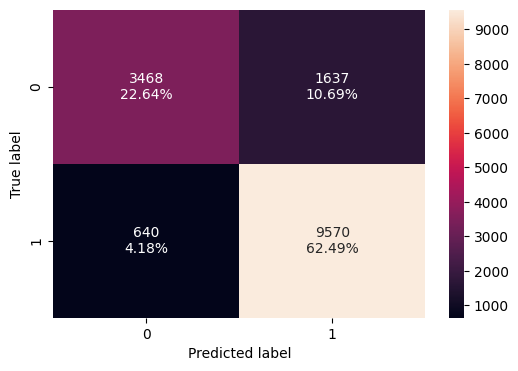

In [ ]:
confusion_matrix_sklearn(xgb2, X_train_over, y_train_over)

In [ ]:
#validation
xgb2val = model_performance_classification_sklearn(xgb2, X_val, y_val)
xgb2val

,Accuracy,Recall,Precision,F1
0,0.729396,0.849295,0.769497,0.807429


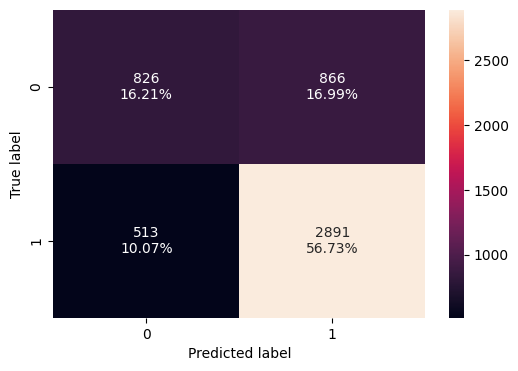

In [ ]:
confusion_matrix_sklearn(xgb2, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(xgb2, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.85496183 0.84824903 0.84857724 0.84393064 0.86583012 0.86502463
 0.85273632 0.87126866 0.85552116 0.84827586]
Recall: 85.544% (0.861%)


In [ ]:
#cross validation scores dataframe
xgb2cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
xgb2cv

,Recall,Std dev
0,85.543755,0.860528


### Model Building with Undersampled data

In [ ]:
#checking the distribution of the target variable
df['case_status'].value_counts(1)

,case_status
1,0.667896
0,0.332104


In [ ]:
print("Before Undersampling, 'Certified' label counts: {}".format(sum(y_train == 1)))
print("Before Undersampling, 'Denied' label counts': {} \n".format(sum(y_train == 0)))

Before Undersampling, 'Certified' label counts: 10210
Before Undersampling, 'Denied' label counts': 5078 



In [ ]:
#do undersampling
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
#see the results
print("After Undersampling, 'Certified' label counts: {}".format(sum(y_train_un == 1)))
print("After Undersampling, 'Denied' label counts': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of X_train_un: {}".format(X_train_un.shape))
print("After Undersampling, the shape of y_train_un: {} \n".format(y_train_un.shape))


After Undersampling, 'Certified' label counts: 5078
After Undersampling, 'Denied' label counts': 5078 

After Undersampling, the shape of X_train_un: (10156, 21)
After Undersampling, the shape of y_train_un: (10156,) 



### Bagging


In [ ]:
#training
bag3 = BaggingClassifier(random_state = 1)
bag3.fit(X_train_un, y_train_un)
model_performance_classification_sklearn(bag3, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.980603,0.968688,0.992334,0.980369


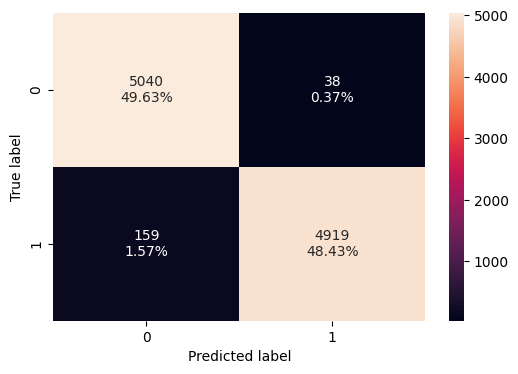

In [ ]:
confusion_matrix_sklearn(bag3, X_train_un, y_train_un)

In [ ]:
#validation
bag3val = model_performance_classification_sklearn(bag3, X_val, y_val)
bag3val

,Accuracy,Recall,Precision,F1
0,0.655808,0.617803,0.82277,0.705705


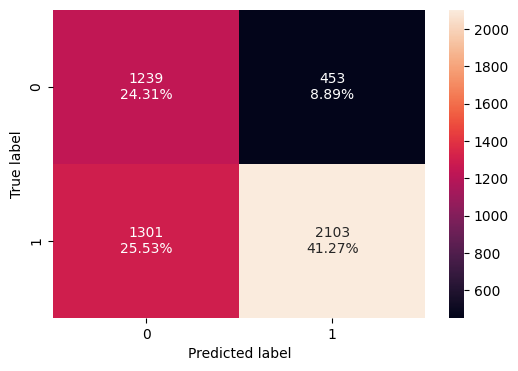

In [ ]:
confusion_matrix_sklearn(bag3, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(bag3, X_train_un, y_train_un, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.64646465 0.61089494 0.60117878 0.58232932 0.61494253 0.59432049
 0.584      0.58333333 0.62896825 0.61359223]
Recall: 60.600% (2.011%)


In [ ]:
#cross validation scores dataframe
bag3cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
bag3cv

,Recall,Std dev
0,60.600245,2.011028


### Decision Tree

In [ ]:
#training
dt3 = DecisionTreeClassifier(random_state = 1)
dt3.fit(X_train_un, y_train_un)
model_performance_classification_sklearn(dt3, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


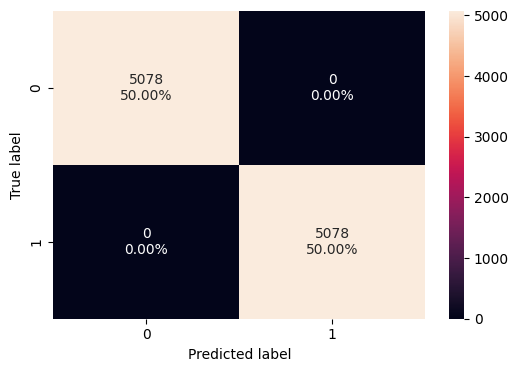

In [ ]:
confusion_matrix_sklearn(dt3, X_train_un, y_train_un)

In [ ]:
#validation
dt3val = model_performance_classification_sklearn(dt3, X_val, y_val)
dt3val

,Accuracy,Recall,Precision,F1
0,0.630887,0.631316,0.774414,0.695582


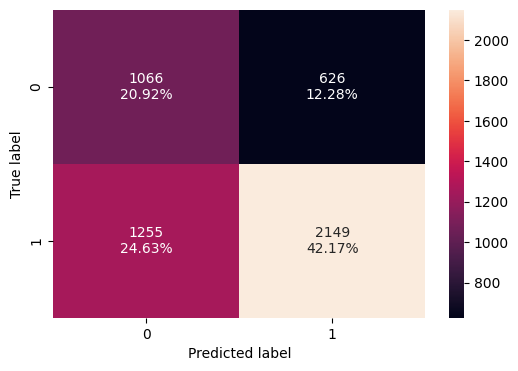

In [ ]:
confusion_matrix_sklearn(dt3, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(dt3, X_train_un, y_train_un, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.66666667 0.63035019 0.62278978 0.60040161 0.61302682 0.60243408
 0.6        0.59090909 0.65079365 0.60776699]
Recall: 61.851% (2.314%)


In [ ]:
#cross validation scores dataframe
dt3cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
dt3cv

,Recall,Std dev
0,61.851389,2.314317


### ADA Boost


In [ ]:
#training
ada3 = AdaBoostClassifier(random_state = 1)
ada3.fit(X_train_un, y_train_un)
model_performance_classification_sklearn(ada3, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.699882,0.717212,0.693186,0.704994


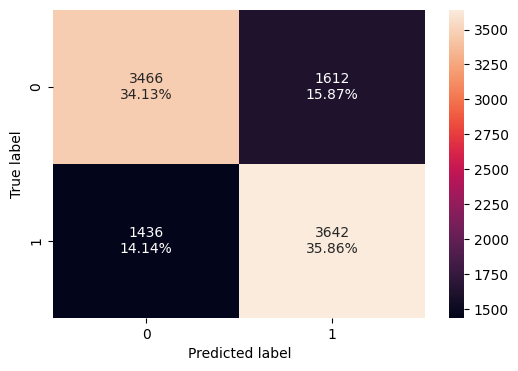

In [ ]:
confusion_matrix_sklearn(ada3, X_train_un, y_train_un)

In [ ]:
#validation
ada3val = model_performance_classification_sklearn(ada3, X_val, y_val)
ada3val

,Accuracy,Recall,Precision,F1
0,0.70467,0.707403,0.825506,0.761905


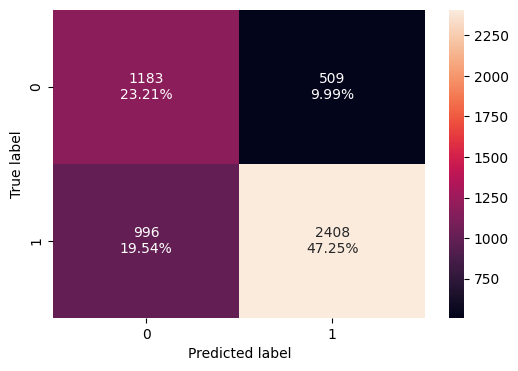

In [ ]:
confusion_matrix_sklearn(ada3, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(ada3, X_train_un, y_train_un, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.72727273 0.72568093 0.67583497 0.69277108 0.72222222 0.73833671
 0.688      0.67234848 0.75595238 0.69902913]
Recall: 70.974% (2.663%)


In [ ]:
#cross validation scores dataframe
ada3cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
ada3cv

,Recall,Std dev
0,70.974486,2.663389


### Gradient Boost

In [ ]:
#training
gb3 = GradientBoostingClassifier(random_state = 1)
gb3.fit(X_train_un, y_train_un)
model_performance_classification_sklearn(gb3, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.720165,0.747341,0.708816,0.727569


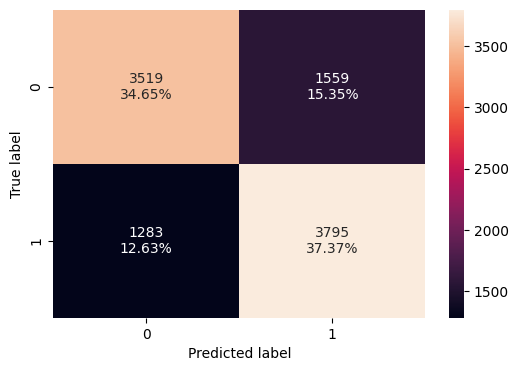

In [ ]:
confusion_matrix_sklearn(gb3, X_train_un, y_train_un)

In [ ]:
#validation
gb3val = model_performance_classification_sklearn(gb3, X_val, y_val)
gb3val

,Accuracy,Recall,Precision,F1
0,0.718014,0.728261,0.82882,0.775293


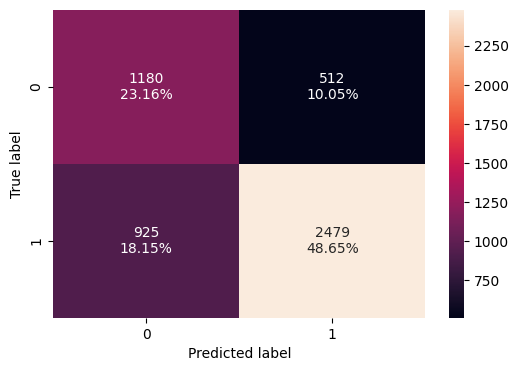

In [ ]:
confusion_matrix_sklearn(gb3, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(gb3, X_train_un, y_train_un, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.74747475 0.77237354 0.72888016 0.71686747 0.75478927 0.74036511
 0.736      0.71212121 0.74801587 0.73398058]
Recall: 73.909% (1.693%)


In [ ]:
#cross validation scores dataframe
gb3cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
gb3cv

,Recall,Std dev
0,73.90868,1.693196


### Random Forest

In [ ]:
#training -- still no need for class_weight = balanced
rf3 = RandomForestClassifier(random_state = 1)
rf3.fit(X_train_un, y_train_un)
model_performance_classification_sklearn(rf3, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


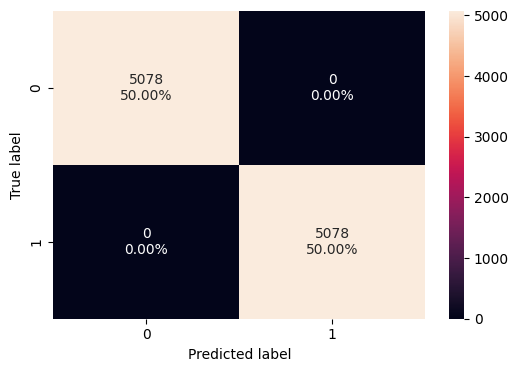

In [ ]:
confusion_matrix_sklearn(rf3, X_train_un, y_train_un)

In [ ]:
#validation
rf3val = model_performance_classification_sklearn(rf3, X_val, y_val)
rf3val

,Accuracy,Recall,Precision,F1
0,0.687991,0.674207,0.826729,0.742718


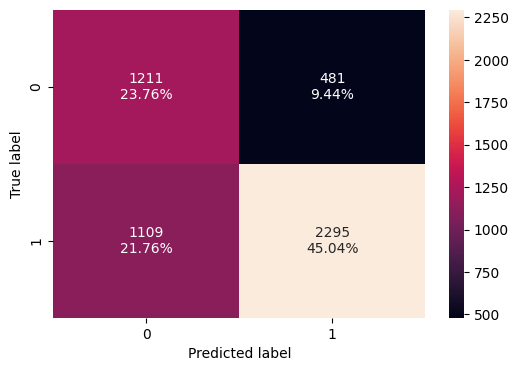

In [ ]:
confusion_matrix_sklearn(rf3, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(rf3, X_train_un, y_train_un, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.72121212 0.68677043 0.66208251 0.6626506  0.68390805 0.68965517
 0.658      0.66287879 0.71230159 0.66407767]
Recall: 68.035% (2.133%)


In [ ]:
#cross validation scores dataframe
rf3cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
rf3cv

,Recall,Std dev
0,68.035369,2.132512


### XGBoost

In [ ]:
#training
xgb3 = XGBClassifier(random_state = 1, eval_metric = "logloss")
xgb3.fit(X_train_un, y_train_un)
model_performance_classification_sklearn(xgb3, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.874458,0.881252,0.869439,0.875306


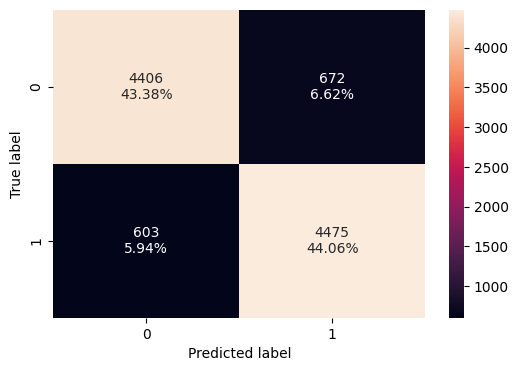

In [ ]:
confusion_matrix_sklearn(xgb3, X_train_un, y_train_un)

In [ ]:
#validation
xgb3val = model_performance_classification_sklearn(xgb3, X_val, y_val)
xgb3val

,Accuracy,Recall,Precision,F1
0,0.690542,0.689189,0.818848,0.748445


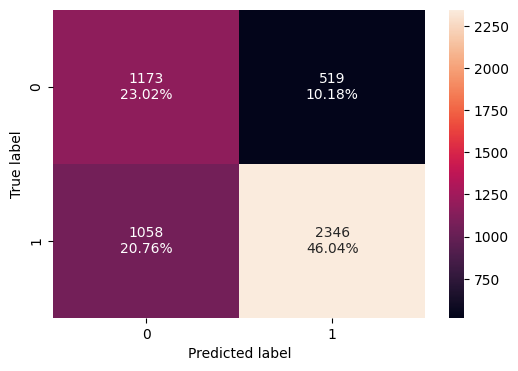

In [ ]:
confusion_matrix_sklearn(xgb3, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(xgb3, X_train_un, y_train_un, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.7030303  0.68677043 0.67976424 0.6746988  0.70498084 0.65314402
 0.672      0.67613636 0.71230159 0.68737864]
Recall: 68.502% (1.695%)


In [ ]:
#cross validation scores dataframe
xgb3cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
xgb3cv

,Recall,Std dev
0,68.502052,1.695402


In [ ]:
# Validation performance comparison

val_comps = pd.concat(
    [
        bag1val.T,
        dt1val.T,
        ada1val.T,
        gb1val.T,
        rf1val.T,
        xgb1val.T,
        bag2val.T,
        dt2val.T,
        ada2val.T,
        gb2val.T,
        rf2val.T,
        xgb2val.T,
        bag3val.T,
        dt3val.T,
        ada3val.T,
        gb3val.T,
        rf3val.T,
        xgb3val.T,
    ],
    axis=1,
)
val_comps.columns = [
    "Bagging",
    "Decision Tree",
    "Ada Boost",
    "Gradient Boost",
    "Random Forest",
    "XGBoost",
    "Bagging Over",
    "Decision Tree Over",
    "Ada Boost Over",
    "Gradient Boost Over",
    "Random Forest Over",
    "XGBoost Over",
    "Bagging Under",
    "Decision Tree Under",
    "Ada Boost Under",
    "Gradient Boost Under",
    "Random Forest Under",
    "XGBoost Under",

]
print("Validation performance comparison:")
val_comps

Validation performance comparison:


,Bagging,Decision Tree,Ada Boost,Gradient Boost,Random Forest,XGBoost,Bagging Over,Decision Tree Over,Ada Boost Over,Gradient Boost Over,Random Forest Over,XGBoost Over,Bagging Under,Decision Tree Under,Ada Boost Under,Gradient Boost Under,Random Forest Under,XGBoost Under
Accuracy,0.697998,0.663069,0.735871,0.755298,0.726845,0.731358,0.697214,0.665031,0.734498,0.755298,0.727630,0.729396,0.655808,0.630887,0.704670,0.718014,0.687991,0.690542
Recall,0.770564,0.745006,0.882197,0.875734,0.840776,0.854583,0.765864,0.741774,0.877203,0.873972,0.833725,0.849295,0.617803,0.631316,0.707403,0.728261,0.674207,0.689189
Precision,0.775806,0.749188,0.760638,0.783443,0.771013,0.768966,0.777513,0.753057,0.761540,0.784340,0.775410,0.769497,0.822770,0.774414,0.825506,0.828820,0.826729,0.818848
F1,0.773176,0.747091,0.816921,0.827022,0.804384,0.809517,0.771644,0.747373,0.815290,0.826733,0.803511,0.807429,0.705705,0.695582,0.761905,0.775293,0.742718,0.748445


Ada Boost wtih the original data, Ada Boost with the oversampled data, Gradient Boost with the original data, and Gradient Boost with the oversampled data have the highest recall scores overall.

Bagging and Decision Tree models consistently lagged behind the other four models in the original, over, and undersampled data -- so we won't bother tuning those. For the other models, this is the best in terms of recall:
* Ada Boost with the original data
* Gradient Boost with the original data
* Random Forest with the original data
* XGBoost with the original data

In [ ]:
# Cross-validated performance comparison

cv_comps = pd.concat(
    [
        bag1cv.T,
        dt1cv.T,
        ada1cv.T,
        gb1cv.T,
        rf1cv.T,
        xgb1cv.T,
        bag2cv.T,
        dt2cv.T,
        ada2cv.T,
        gb2cv.T,
        rf2cv.T,
        xgb2cv.T,
        bag3cv.T,
        dt3cv.T,
        ada3cv.T,
        gb3cv.T,
        rf3cv.T,
        xgb3cv.T,
    ],
    axis=1,
)
cv_comps.columns = [
    "Bagging",
    "Decision Tree",
    "Ada Boost",
    "Gradient Boost",
    "Random Forest",
    "XGBoost",
    "Bagging Over",
    "Decision Tree Over",
    "Ada Boost Over",
    "Gradient Boost Over",
    "Random Forest Over",
    "XGBoost Over",
    "Bagging Under",
    "Decision Tree Under",
    "Ada Boost Under",
    "Gradient Boost Under",
    "Random Forest Under",
    "XGBoost Under",

]
print("Cross-validated performance comparison:")
cv_comps

Cross-validated performance comparison:


,Bagging,Decision Tree,Ada Boost,Gradient Boost,Random Forest,XGBoost,Bagging Over,Decision Tree Over,Ada Boost Over,Gradient Boost Over,Random Forest Over,XGBoost Over,Bagging Under,Decision Tree Under,Ada Boost Under,Gradient Boost Under,Random Forest Under,XGBoost Under
Recall,77.225500,74.182096,88.593091,87.313581,84.747012,85.355797,77.681534,74.061151,88.602264,87.214843,83.977139,85.543755,60.600245,61.851389,70.974486,73.908680,68.035369,68.502052
Std dev,0.840901,0.979077,1.025612,1.369651,1.234892,1.021440,0.924657,1.429644,0.922373,0.898984,0.860444,0.860528,2.011028,2.314317,2.663389,1.693196,2.132512,1.695402


Ada Boost with the oversampled data, Ada Boost with the original data, Gradient Boost with the original data, and Gradient Boost with the oversampled data show the best cross-validated performance with respect to recall, though Gradient Boost with the oversampled data shows the best stability.

In terms of each model, this is the best for cross-validated recall scores:
* Ada Boost with oversampled data
* Gradient Boost with original data
* Random Forest with original data
* XGBoost with oversampled data

## Hyperparameter Tuning

### ADA Boost with oversampled data

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

In [ ]:
%%time

#define the model
adatuning = AdaBoostClassifier(random_state = 1)

#parameter grid for random search
param_grid = {
    'n_estimators': np.arange(50, 150, 10),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator': [
        DecisionTreeClassifier(max_depth = 1, random_state = 1),
        DecisionTreeClassifier(max_depth = 2, random_state = 1),
        DecisionTreeClassifier(max_depth = 3, random_state = 1)]
              }
#call randomized search
randomized_cv = RandomizedSearchCV(estimator = adatuning, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 5, random_state = 1, verbose = 2)
#set n_jobs = 1 because Colab returned an error saying "a task failed to unserialize" and suggested making that change

#fit parameters in randomized search
randomized_cv.fit(X_train_over, y_train_over)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'n_estimators': 50, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9375122428991185:
CPU times: user 4.33 s, sys: 831 ms, total: 5.16 s
Wall time: 6min 40s


In [ ]:
#build the ada model with the best params
ada4 = AdaBoostClassifier(random_state = 1, n_estimators = 50, learning_rate = 0.1, estimator = DecisionTreeClassifier(max_depth = 1, random_state = 1))

#fit the model on the oversampled data
ada4.fit(X_train_over, y_train_over)

#check the performance on training
model_performance_classification_sklearn(ada4, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.716161,0.93761,0.720696,0.814966


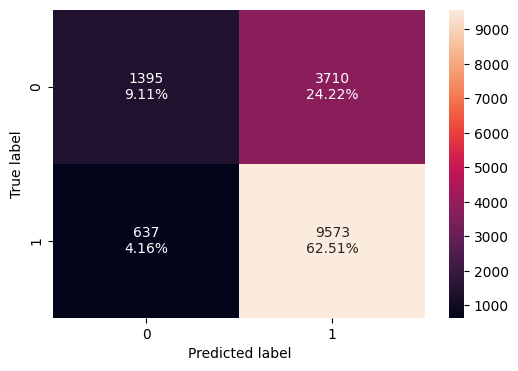

In [ ]:
confusion_matrix_sklearn(ada4, X_train_over, y_train_over)

In [ ]:
#validation
ada4val = model_performance_classification_sklearn(ada4, X_val, y_val)
ada4val

,Accuracy,Recall,Precision,F1
0,0.718603,0.93302,0.724783,0.815823


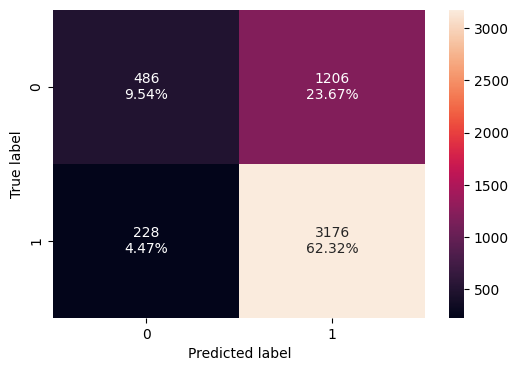

In [ ]:
confusion_matrix_sklearn(ada4, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(ada4, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.93416031 0.93968872 0.92987805 0.93545279 0.94787645 0.93103448
 0.93731343 0.93843284 0.96594427 0.93793103]
Recall: 93.977% (0.993%)


In [ ]:
#cross validation scores dataframe
ada4cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
ada4cv

,Recall,Std dev
0,93.977124,0.993119


### Gradient Boost with original data

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

In [ ]:
%%time

#define the model
gbtuning = GradientBoostingClassifier(random_state = 1)

#parameter grid for random search
param_grid = {
    'init': [AdaBoostClassifier(random_state = 1), DecisionTreeClassifier(random_state = 1)],
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', 0.3, 0.5]
              }
#call randomized search
randomized_cv = RandomizedSearchCV(estimator = gbtuning, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 5, random_state = 1, verbose = 2)

#fit parameters in randomized search
randomized_cv.fit(X_train, y_train)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 'sqrt', 'learning_rate': 0.005, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9366307541625856:
CPU times: user 6.59 s, sys: 868 ms, total: 7.46 s
Wall time: 9min 1s


In [ ]:
#build the gradient boosting model with the best params
gb4 = GradientBoostingClassifier(init = AdaBoostClassifier(random_state=1), random_state = 1, n_estimators = 150, learning_rate = 0.005, subsample = 0.9, max_features = 'sqrt')

#fit the model on the oversampled data
gb4.fit(X_train, y_train)

#check the performance on training
model_performance_classification_sklearn(gb4, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.73005,0.930656,0.735392,0.821581


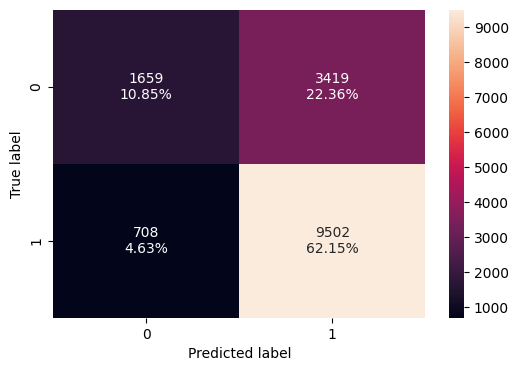

In [ ]:
confusion_matrix_sklearn(gb4, X_train, y_train)

In [ ]:
#validation
gb4val = model_performance_classification_sklearn(gb4, X_val, y_val)
gb4val

,Accuracy,Recall,Precision,F1
0,0.73175,0.925969,0.738692,0.821796


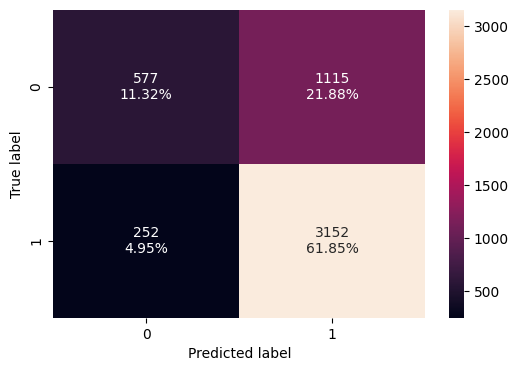

In [ ]:
confusion_matrix_sklearn(gb4, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(gb4, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.9077527  0.93089832 0.92089249 0.91868345 0.91602317 0.92635659
 0.9127907  0.9258216  0.93272171 0.92793682]
Recall: 92.199% (0.774%)


In [ ]:
#cross validation scores dataframe
gb4cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
gb4cv

,Recall,Std dev
0,92.198775,0.773763


### Random Forest with original data

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

In [ ]:
%%time

#define the model
rftuning = RandomForestClassifier(random_state = 1)

#parameter grid for random search
param_grid = {
    'n_estimators': np.arange(50, 150, 25),
    'min_samples_leaf': [1, 2, 4, 5, 10],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.9],
    'max_samples': np.arange(0.5, 1.0, 0.1),
    'max_depth': np.arange(1, 5, 1),
    'class_weight': ['balanced', 'balanced_subsample']
              }
#call randomized search
randomized_cv = RandomizedSearchCV(estimator = rftuning, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 5, random_state = 1, verbose = 2)

#fit parameters in randomized search
randomized_cv.fit(X_train, y_train)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'n_estimators': 125, 'min_samples_leaf': 10, 'max_samples': 0.7999999999999999, 'max_features': 0.9, 'max_depth': 1, 'class_weight': 'balanced'} with CV score=0.9313418217433889:
CPU times: user 2.72 s, sys: 333 ms, total: 3.06 s
Wall time: 2min 40s


In [ ]:
#build the random forest model with the best params
rf4 = RandomForestClassifier(n_estimators = 125, min_samples_leaf = 10, max_samples = 0.799, max_features = 0.9, max_depth = 1, class_weight = 'balanced', random_state = 1)

#fit the model on the oversampled data
rf4.fit(X_train, y_train)

#check the performance on training
model_performance_classification_sklearn(rf4, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.709903,0.931342,0.71804,0.810898


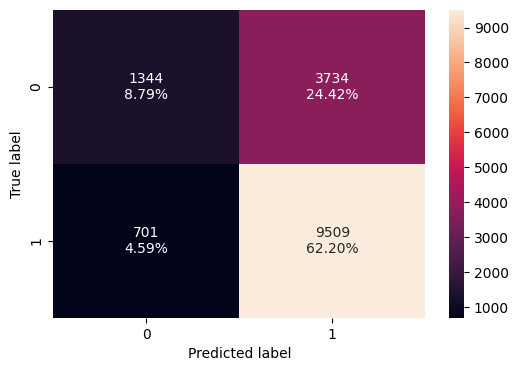

In [ ]:
confusion_matrix_sklearn(rf4, X_train, y_train)

In [ ]:
#validation
rf4val = model_performance_classification_sklearn(rf4, X_val, y_val)
rf4val

,Accuracy,Recall,Precision,F1
0,0.715856,0.933901,0.722172,0.814502


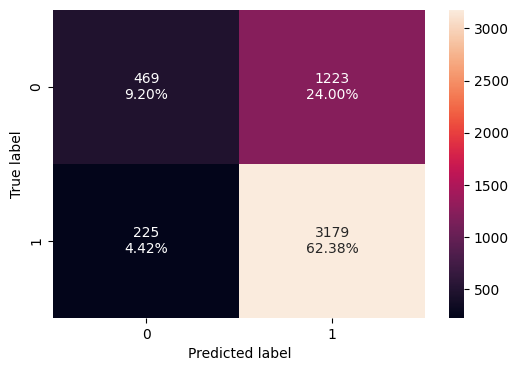

In [ ]:
confusion_matrix_sklearn(rf4, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(rf4, X_train, y_train, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.92737978 0.93682132 0.93407708 0.91771539 0.92374517 0.93410853
 0.93410853 0.93615023 0.93577982 0.93385982]
Recall: 93.137% (0.601%)


In [ ]:
#cross validation scores dataframe
rf4cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
rf4cv

,Recall,Std dev
0,93.137457,0.600873


### XGBoost with oversampled data

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [ ]:
%%time

#define the model
xgbtuning = XGBClassifier(random_state = 1, eval_metric = 'logloss')

#parameter grid for random search
param_grid = {
    'n_estimators': np.arange(50, 250, 25),
    'subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 3, 5, 8],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'colsample_bylevel': [0.3, 0.5, 0.7, 1.0]
              }

#call randomized search
randomized_cv = RandomizedSearchCV(estimator = xgbtuning, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 5, random_state = 1, verbose = 2)

#fit parameters in randomized search
randomized_cv.fit(X_train_over, y_train_over)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'subsample': 0.5, 'n_estimators': 75, 'gamma': 8, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.3} with CV score=0.9149853085210579:
CPU times: user 1.42 s, sys: 152 ms, total: 1.57 s
Wall time: 45.9 s


In [ ]:
#build the XGBoost model with the best params
xgb4 = XGBClassifier(subsample = 0.5, n_estimators = 75, gamma = 8, colsample_bytree = 0.3, colsample_bylevel = 0.3, random_state = 1)

#fit the model on the oversampled data
xgb4.fit(X_train_over, y_train_over)

#check the performance on training
model_performance_classification_sklearn(xgb4, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.727522,0.920568,0.736541,0.818336


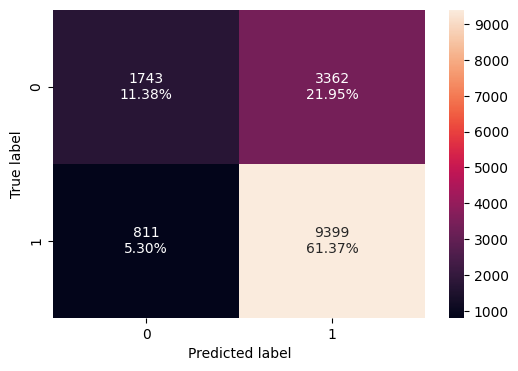

In [ ]:
confusion_matrix_sklearn(xgb4, X_train_over, y_train_over)

In [ ]:
#validation
xgb4val = model_performance_classification_sklearn(xgb4, X_val, y_val)
xgb4val

,Accuracy,Recall,Precision,F1
0,0.730769,0.916569,0.741445,0.819758


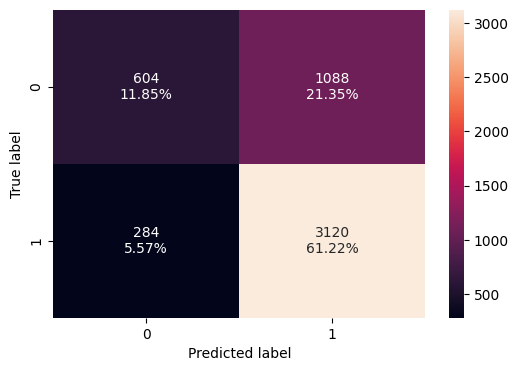

In [ ]:
confusion_matrix_sklearn(xgb4, X_val, y_val)

In [ ]:
#cross validation
results = cross_val_score(xgb4, X_train_over, y_train_over, cv = kfold, scoring = 'recall')
print(results)
print("Recall: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.89503817 0.91634241 0.91565041 0.91233141 0.90637066 0.92118227
 0.91044776 0.9113806  0.90299278 0.90640394]
Recall: 90.981% (0.710%)


In [ ]:
#cross validation scores dataframe
xgb4cv = pd.DataFrame(
    {"Recall": results.mean()*100.0, "Std dev": results.std()*100.0,},
    index=[0],
    )
xgb4cv

,Recall,Std dev
0,90.981404,0.709545


## Model Performance Summary and Final Model Selection

### Comparing Models

In [ ]:
# Validation performance comparison of tuned models

tuned_val_comps = pd.concat(
    [
     ada4val.T,
     gb4val.T,
     rf4val.T,
     xgb4val.T
    ],
    axis = 1,
)
tuned_val_comps.columns = [
    "Ada Boost Over Tuned",
    "Gradient Boost Tuned",
    "Random Forest Tuned",
    "XGBoost Over Tuned",

]

print("Tuned Validation performance comparison:")
tuned_val_comps

Tuned Validation performance comparison:


,Ada Boost Over Tuned,Gradient Boost Tuned,Random Forest Tuned,XGBoost Over Tuned
Accuracy,0.718603,0.731750,0.715856,0.730769
Recall,0.933020,0.925969,0.933901,0.916569
Precision,0.724783,0.738692,0.722172,0.741445
F1,0.815823,0.821796,0.814502,0.819758


Random Forest tuned has the highest recall score, followed by ADA Boost over tuned and Gradient Boost tuned.

In [ ]:
# Cross-validated performance comparison of tuned models

tuned_cv_comps = pd.concat(
    [
        ada4cv.T,
        gb4cv.T,
        rf4cv.T,
        xgb4cv.T,
    ],
    axis=1,
)
tuned_cv_comps.columns = [
    "Ada Boost Over Tuned",
    "Gradient Boost Tuned",
    "Random Forest Tuned",
    "XGBoost Over Tuned",

]
print("Tuned cross-validated performance comparison:")
tuned_cv_comps

Tuned cross-validated performance comparison:


,Ada Boost Over Tuned,Gradient Boost Tuned,Random Forest Tuned,XGBoost Over Tuned
Recall,93.977124,92.198775,93.137457,90.981404
Std dev,0.993119,0.773763,0.600873,0.709545


In [ ]:
pd.set_option('display.max_columns', None)
all_val_comps = pd.concat([val_comps, tuned_val_comps], axis = 1)
all_val_comps

,Bagging,Decision Tree,Ada Boost,Gradient Boost,Random Forest,XGBoost,Bagging Over,Decision Tree Over,Ada Boost Over,Gradient Boost Over,Random Forest Over,XGBoost Over,Bagging Under,Decision Tree Under,Ada Boost Under,Gradient Boost Under,Random Forest Under,XGBoost Under,Ada Boost Over Tuned,Gradient Boost Tuned,Random Forest Tuned,XGBoost Over Tuned
Accuracy,0.697998,0.663069,0.735871,0.755298,0.726845,0.731358,0.697214,0.665031,0.734498,0.755298,0.727630,0.729396,0.655808,0.630887,0.704670,0.718014,0.687991,0.690542,0.718603,0.731750,0.715856,0.730769
Recall,0.770564,0.745006,0.882197,0.875734,0.840776,0.854583,0.765864,0.741774,0.877203,0.873972,0.833725,0.849295,0.617803,0.631316,0.707403,0.728261,0.674207,0.689189,0.933020,0.925969,0.933901,0.916569
Precision,0.775806,0.749188,0.760638,0.783443,0.771013,0.768966,0.777513,0.753057,0.761540,0.784340,0.775410,0.769497,0.822770,0.774414,0.825506,0.828820,0.826729,0.818848,0.724783,0.738692,0.722172,0.741445
F1,0.773176,0.747091,0.816921,0.827022,0.804384,0.809517,0.771644,0.747373,0.815290,0.826733,0.803511,0.807429,0.705705,0.695582,0.761905,0.775293,0.742718,0.748445,0.815823,0.821796,0.814502,0.819758


In [ ]:
all_cv_comps = pd.concat([cv_comps, tuned_cv_comps], axis = 1)
all_cv_comps

,Bagging,Decision Tree,Ada Boost,Gradient Boost,Random Forest,XGBoost,Bagging Over,Decision Tree Over,Ada Boost Over,Gradient Boost Over,Random Forest Over,XGBoost Over,Bagging Under,Decision Tree Under,Ada Boost Under,Gradient Boost Under,Random Forest Under,XGBoost Under,Ada Boost Over Tuned,Gradient Boost Tuned,Random Forest Tuned,XGBoost Over Tuned
Recall,77.225500,74.182096,88.593091,87.313581,84.747012,85.355797,77.681534,74.061151,88.602264,87.214843,83.977139,85.543755,60.600245,61.851389,70.974486,73.908680,68.035369,68.502052,93.977124,92.198775,93.137457,90.981404
Std dev,0.840901,0.979077,1.025612,1.369651,1.234892,1.021440,0.924657,1.429644,0.922373,0.898984,0.860444,0.860528,2.011028,2.314317,2.663389,1.693196,2.132512,1.695402,0.993119,0.773763,0.600873,0.709545


ADA Boost over tuned has the best cross-validated recall score, followed by Random Forest tuned and Gradient Boost tuned. Of the three, Random Forest Tuned has the lowest standard deviation, followed by Gradient Boost tuned, and ADA Boost tuned.

Given that Random Forest tuned model performed the best with the validation set, had the second-highest cross-validated recall score, and had the lowest standard deviation (thus was the most stable model), we'll select this model.

### Running Random Forest Tuned on test set

In [ ]:
#run Random Forest Tuned on the test set
rf4test = model_performance_classification_sklearn(rf4, X_test, y_test)
rf4test

,Accuracy,Recall,Precision,F1
0,0.708203,0.930082,0.717101,0.809822


Random Forest tuned trained on the original data has ~93% recall on the test set, which almost the same as the model's cross-validated performance -- so it generalizes well.

### Random Forest Tuned feature importances

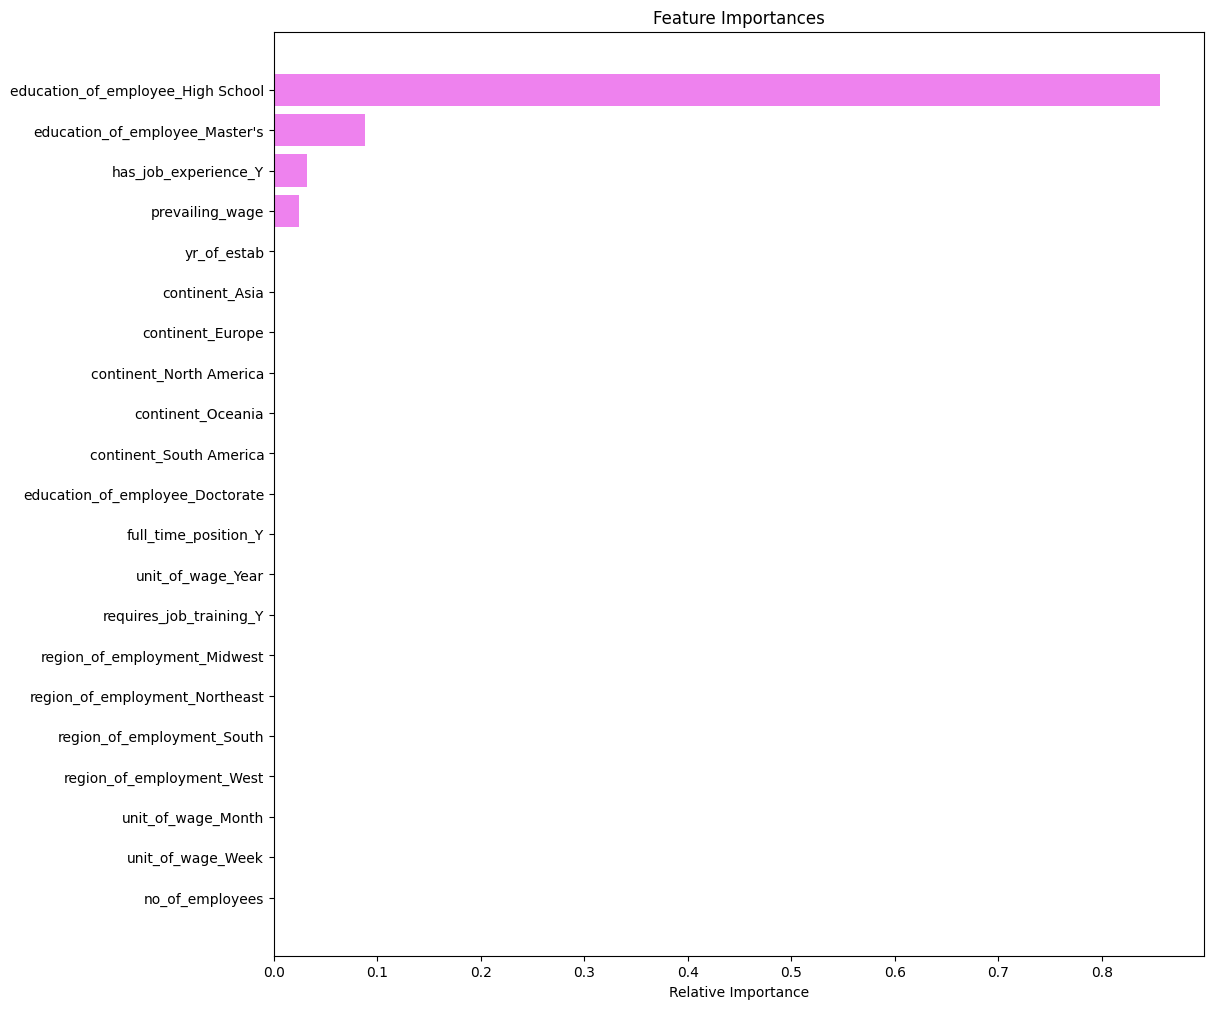

In [ ]:
feature_names = X_train.columns
importances = rf4.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education generally is a major factor in whether an applicant's case is certified or denied -- and whether the applicant has only a high school education is the most important variable, followed by whether the applicant has a master's degree. Whether they have job experience is next in importance, followed by what the prevailing wage for their prospective industry.

## Actionable Insights and Recommendations

* The Random Forest Tuned model could potentially be tweaked further to improve precision, accuracy, and F1 score.
* That said, the recall score on the test set is very high, and is almost about the same as the cross-validated recall score -- meaning the model generalizes well and is likely to continue performing well on unseen data.
* When considering an applicant, education level is most important. If an applicant has only a high school education, there's a good chance their application will be denied. If they have a graduate degree, that improves their chances of certification.
* Job experience also matters -- if they have no job experience, it's also a sign the applicant may be denied.
* Lastly -- if the prevailing wage is on the lower end, the application may be denied as well.
* Bottom line -- a suitable profile for a candidate whose application will be approved includes a graduate degree, has job experience, and is seeking a job with a higher prevailing wage.
* More outreach could be done to increase the number of applicants from Oceania, and more incentives could be provided to attract applicants to roles in the Island region.

<font size=6 color='blue'>Power Ahead</font>
___